# INTERNAL DATASET

Este dataset contiene información detallada sobre los préstamos (TL, por sus siglas en inglés "Total Loans") de un individuo, proveniente de los registros del Credit Information Bureau (India) Limited (CIBIL) y recopilados por un banco. Incluye detalles sobre el estado de los préstamos, su antigüedad, el cumplimiento de los pagos y otra información relevante para la evaluación del riesgo crediticio. Las variables incluidas son las siguientes:Este dataset contiene información interna detallada sobre los préstamos (TL, por sus siglas en inglés "Total Loans") de un individuo, proveniente de los registros del Credit Information Bureau (India) Limited (CIBIL) y recopilados por un banco. Incluye detalles sobre el estado de los préstamos, su antigüedad, el cumplimiento de los pagos y otra información relevante para la evaluación del riesgo crediticio. Las variables incluidas son las siguientes:

## Definición General
Las siguientes variables corresponden a datos bancarios internos utilizados en el análisis de líneas de crédito y cuentas comerciales. Se incluyen métricas relacionadas con la cantidad, antigüedad y estado de las cuentas en diferentes periodos de tiempo.

### Variables y Descripciones

- **PROPECTID**: Identificador único asignado a cada cliente.

- **Total_TL**: Representa el número total de líneas comerciales o cuentas en la oficina de crédito.

- **Tot_Closed_TL**: Cantidad total de cuentas o líneas comerciales que han sido cerradas.

- **Tot_Active_TL**: Número total de cuentas activas en el sistema.

- **Total_TL_opened_L6M**: Total de cuentas que han sido abiertas en los últimos 6 meses.

- **Tot_TL_closed_L6M**: Total de cuentas que han sido cerradas en los últimos 6 meses.

- **pct_tl_open_L6M**: Porcentaje de cuentas abiertas en los últimos 6 meses respecto al total de cuentas.

- **pct_tl_closed_L6M**: Porcentaje de cuentas cerradas en los últimos 6 meses respecto al total de cuentas.

- **pct_active_tl**: Proporción de cuentas activas en relación con el total de cuentas.

- **pct_closed_tl**: Proporción de cuentas cerradas en relación con el total de cuentas.

- **Total_TL_opened_L12M**: Total de cuentas abiertas en los últimos 12 meses.

- **Tot_TL_closed_L12M**: Total de cuentas cerradas en los últimos 12 meses.

- **pct_tl_open_L12M**: Porcentaje de cuentas abiertas en los últimos 12 meses respecto al total de cuentas.

- **pct_tl_closed_L12M**: Porcentaje de cuentas cerradas en los últimos 12 meses respecto al total de cuentas.

- **Tot_Missed_Pmnt**: Cantidad total de pagos atrasados o incumplidos en las cuentas registradas.

- **Auto_TL**: Recuento del número de cuentas de préstamos para automóviles.

- **CC_TL**: Número de cuentas de tarjetas de crédito.

- **Consumer_TL**: Número de cuentas asociadas a bienes de consumo.

- **Gold_TL**: Cantidad de cuentas de préstamos respaldados por oro.

- **Home_TL**: Número de cuentas de préstamos hipotecarios o para vivienda.

- **PL_TL**: Cantidad de cuentas de préstamos personales.

- **Secured_TL**: Total de cuentas que están garantizadas por algún tipo de colateral.

- **Unsecured_TL**: Número de cuentas que no cuentan con garantías asociadas.

- **Other_TL**: Recuento de otras cuentas que no entran en las categorías específicas.

- **Age_Oldest_TL**: Antigüedad de la cuenta más antigua registrada.

- **Age_Newest_TL**: Antigüedad de la cuenta más reciente registrada.

In [ ]:
# 1. Importaciones estándar de Python
import os
import joblib

# 2. Librerías de terceros
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# 3. Importaciones específicas de librerías
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import  PowerTransformer, MinMaxScaler

# 4. Importaciones locales (módulos del proyecto)
from modulos.data_description import *
from modulos.data_model import *
from modulos.data_visualization import *

# 5. Configuración adicional de pandas
pd.set_option('display.max_columns', None)

## 1. Carga de datos

In [2]:
# Cargamos el dataset
ruta_binario = os.path.join('data', 'Internal_Bank_Dataset.plk')
internal = joblib.load(ruta_binario)

# Remplazamos el valor asignado como nulo para que no afecta al EDA
internal.replace(-99999, np.nan, inplace=True)

In [3]:
# Visualizamos 5 primeras y 5 últimas líneas del dataframe
print(head_tail(internal, 5))
print('-' * 50)

# Resumen estadístico de los datos numéricos
print(internal.describe())

   PROSPECTID Total_TL Tot_Closed_TL Tot_Active_TL Total_TL_opened_L6M  \
0           1        5             4             1                   0   
1           2        1             0             1                   0   
2           3        8             0             8                   1   
3           4        1             0             1                   1   
4           5        3             2             1                   0   
5         ...      ...           ...           ...                 ...   
6       51332        3             0             3                   1   
7       51333        4             2             2                   0   
8       51334        2             1             1                   1   
9       51335        2             1             1                   0   
10      51336        1             0             1                   0   

   Tot_TL_closed_L6M pct_tl_open_L6M pct_tl_closed_L6M pct_active_tl  \
0                  0             0.0   

In [4]:
# Función que muestra la estructura de cada variable
for col in internal.columns.tolist():
    describe_columna(internal, col)

Columna: PROSPECTID  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 51336
Valores más frecuentes:
51336 	 1
1 	 1
2 	 1
3 	 1
4 	 1
5 	 1
6 	 1
7 	 1
51320 	 1
51319 	 1
Columna: Total_TL  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 107
Valores más frecuentes:
1 	 16550
2 	 9269
3 	 5867
4 	 4027
5 	 2872
6 	 2267
7 	 1678
8 	 1321
9 	 1083
10 	 815
Columna: Tot_Closed_TL  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 100
Valores más frecuentes:
0 	 18377
1 	 13055
2 	 5914
3 	 3334
4 	 2250
5 	 1613
6 	 1161
7 	 928
8 	 654
9 	 546
Columna: Tot_Active_TL  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 32
Valores más frecuentes:
1 	 19163
2 	 9640
0 	 8519
3 	 5263
4 	 3091
5 	 1877
6 	 1247
7 	 795
8 	 543
9 	 385
Columna: Total_TL_opened_L6M  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 20
Valore

### 1.1. Obtención variable objetivo

In [ ]:
# Cargamos el dataset external
ruta_binario = os.path.join('data', 'external_Cibil_Dataset.plk')
external = joblib.load(ruta_binario)

# Remplazamos el valor asignado como nulo para que no afecta al EDA
internal.replace(-99999, np.nan, inplace=True)

In [ ]:
# Extraemos la columna 'Credit_Score' del dataset external
internal = pd.merge(internal, external, on='PROSPECTID', how='inner',)[internal.columns.tolist() + ['Credit_Score']]

## 2. Calidad del Dato

### 2.1. Valores Nulos

Mostrar cuántos valores nulos hay por columna y su porcentaje

In [7]:
# Contamos la cantidad de valores nulos por columna
q_nulos = internal.isnull().sum()

# Filtramos solo las columnas que tienen valores nulos
q_nulos = q_nulos[q_nulos > 0]

# Calculamos el porcentaje de valores nulos respecto al total de filas
p_nulos = (q_nulos / len(internal) * 100).round(2)

# Creamos un DataFrame con la cantidad y el porcentaje de valores nulos
df_nulos = pd.DataFrame({
    'Cantidad': q_nulos,
    'Porcentaje': p_nulos
}).sort_values(by='Cantidad', ascending=False)

# Imprimimos el DataFrame resultante
print(df_nulos)

               Cantidad  Porcentaje
Age_Oldest_TL        40        0.08
Age_Newest_TL        40        0.08


La cantidad de valores nulos en cada columna es exactamente la misma por lo que vamos a estudiar si corresponde a las mismas observaciones

In [ ]:
# Identificamos las filas donde 'Age_Newest_TL' es nulo
x = internal['Age_Newest_TL'].isnull()

# Identificamos las filas donde 'Age_Oldest_TL' es nulo
y = internal['Age_Oldest_TL'].isnull()

# Verificamos si las mismas filas tienen valores nulos en ambas columnas
if (x == y).all():
    print("Las mismas filas tienen valores nulos en ambas columnas.")

# Mostramos estadísticas descriptivas de las filas donde 'Age_Newest_TL' es nulo
internal.loc[x, :].describe()

Se decide realizar una imputación aleatoria que mantenga la distribución de las variables

In [ ]:
# Imputa los valores nulos en 'Age_Oldest_TL' seleccionando aleatoriamente valores existentes de la misma columna
internal.loc[
    internal['Age_Oldest_TL'].isnull(), 'Age_Oldest_TL'
] = np.random.choice(internal['Age_Oldest_TL'].dropna(), size=internal['Age_Oldest_TL'].isnull().sum())

# Imputa los valores nulos en 'Age_Newest_TL' seleccionando aleatoriamente valores existentes de la misma columna
internal.loc[
    internal['Age_Newest_TL'].isnull(), 'Age_Newest_TL'
] = np.random.choice(internal['Age_Newest_TL'].dropna(), size=internal['Age_Newest_TL'].isnull().sum())


### 2.2. Agragación de Características

Vamos a realizar una agregación de variables que representan una misma característica en diferentes límites temporales utilizando un modelo PCA (Análisis de Componentes Principales). Optamos por PCA en lugar de la media ponderada debido a que existe una correlación significativa entre las variables, lo que puede introducir sesgos si se utilizan pesos arbitrarios. Además, PCA captura de manera eficiente la variabilidad temporal de los datos, lo que nos permitirá reducir la dimensionalidad sin perder la información relevante. Esto facilitará la interpretación y mejorará el rendimiento del modelo.

In [12]:
# Definir las nuevas columnas y sus variables correspondientes
pca_columns = {
    'Total_TL_opened_pca': ['Total_TL_opened_L6M', 'Total_TL_opened_L12M'],
    'Tot_TL_closed_pca': ['Tot_TL_closed_L6M', 'Tot_TL_closed_L12M'],
    'pct_tl_open_pca': ['pct_tl_open_L6M', 'pct_tl_open_L12M'],
    'pct_tl_closed_pca': ['pct_tl_closed_L6M', 'pct_tl_closed_L12M']
}

# Aplicar PCA para cada conjunto de variables en el diccionario
for new_col, variables in pca_columns.items():
    internal[new_col] = agregacion_pca(internal, 1, *variables)
    internal.drop(columns=variables, inplace=True)

### 2.3. Outliers

#### 2.3.1. Descripción Outliers

In [13]:
# Creamos una variable con las variables numéricas
numeric_features = internal.drop(['PROSPECTID', 'Credit_Score'], axis=1).columns


In [14]:
# Diccionario para almacenar los outliers
outlier_count = {}

# Contamos los outliers por columna
for column in numeric_features:
    # Calcular el rango intercuartílico y los límites
    Q1 = internal[column].quantile(0.25)
    Q3 = internal[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = internal[(internal[column] < lower_bound) | (internal[column] > upper_bound)]
    outlier_count[column] = outliers.shape[0]

# Mostrar el recuento de outliers
print('Recuento de outliers por feature:')
for column, count in outlier_count.items():
    if count > 0:
        print(f'{column}: {count}')


Recuento de outliers por feature:
Total_TL: 4865
Tot_Closed_TL: 4704
Tot_Active_TL: 2536
Tot_Missed_Pmnt: 2373
Auto_TL: 1701
CC_TL: 4593
Consumer_TL: 6961
Gold_TL: 7472
Home_TL: 2715
PL_TL: 8618
Secured_TL: 4511
Unsecured_TL: 4687
Other_TL: 6072
Age_Oldest_TL: 2266
Age_Newest_TL: 5756
Total_TL_opened_pca: 3129
Tot_TL_closed_pca: 2412
pct_tl_closed_pca: 5341


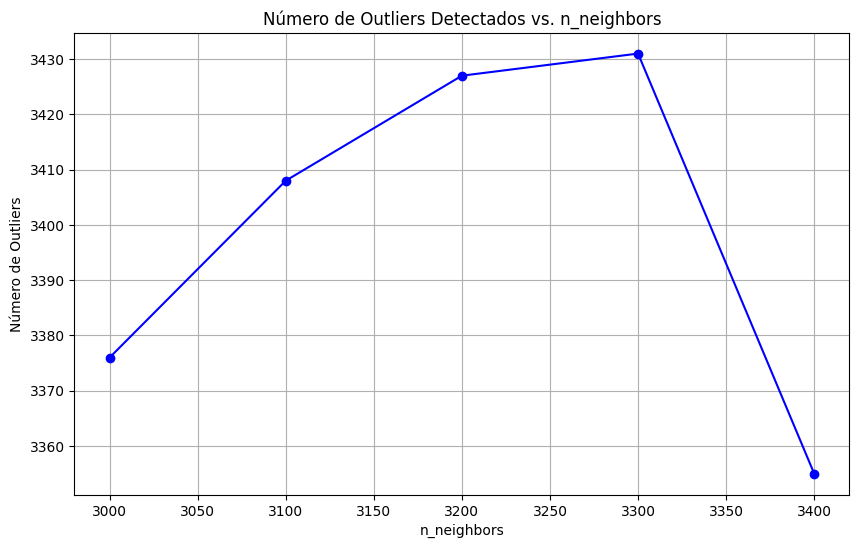

n_neighbors=3000 -> Número de outliers: 3376
n_neighbors=3100 -> Número de outliers: 3408
n_neighbors=3200 -> Número de outliers: 3427
n_neighbors=3300 -> Número de outliers: 3431
n_neighbors=3400 -> Número de outliers: 3355
El valor de n_neighbors con el máximo número de outliers (3431) es: 3300


PROSPECTID     Total_TL  Tot_Closed_TL  Tot_Active_TL  pct_active_tl  \
count   3431.000000  3431.000000    3431.000000    3431.000000    3431.000000   
mean   25770.435733    17.059166      12.544156       4.515010       0.289870   
std    14979.755923    18.932264      16.636213       5.012549       0.310206   
min       16.000000     1.000000       0.000000       0.000000       0.000000   
25%    12840.500000     1.000000       1.000000       0.000000       0.000000   
50%    25940.000000    12.000000       6.000000       3.000000       0.190000   
75%    38748.500000    26.000000      19.000000       8.000000       0.479500   
max    51331.000000   235.000000     216.000000      47.000000       1.000000   

       pct_closed_tl  Tot_Missed_Pmnt      Auto_TL        CC_TL  Consumer_TL  \
count    3431.000000      3431.000000  3431.000000  3431.000000  3431.000000   
mean        0.710130         1.471291     0.730108     0.259108     2.971145   
std         0.310206         2.491907     1.344471     0.926552     5.557338   
min         0.000000         0.000000     0.000000     0.000000     0.000000   
25%         0.520500         0.000000     0.000000     0.000000     0.000000   
50%         0.810000         0.000000     0.000000     0.000000     0.000000   
75%         1.000000         2.000000     1.000000     0.000000     3.000000   
max         1.000000        34.000000    27.000000    27.000000    41.000000   

           Gold_TL      Home_TL        PL_TL   Secured_TL  Unsecured_TL  \
count  3431.000000  3431.000000  3431.000000  3431.000000   3431.000000   
mean      9.153891     0.140192     0.689886    11.877587      5.181580   
std      16.585486     0.549468     1.722602    18.065499      7.586429   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     1.000000      0.000000   
50%       0.000000     0.000000     0.000000     2.000000      1.000000   
75%      15.000000     0.000000     1.000000    19.000000      7.000000   
max     235.000000    10.000000    29.000000   235.000000     55.000000   

          Other_TL  Age_Oldest_TL  Age_Newest_TL  Credit_Score  \
count  3431.000000    3431.000000    3431.000000   3431.000000   
mean      3.114835      82.215681      33.930341    685.342466   
std       5.978356      68.644745      54.080769     30.503093   
min       0.000000       1.000000       0.000000    489.000000   
25%       0.000000      25.000000       2.000000    668.000000   
50%       1.000000      60.000000       6.000000    682.000000   
75%       3.000000     122.000000      24.000000    699.000000   
max      80.000000     392.000000     392.000000    811.000000   

       Total_TL_opened_pca  Tot_TL_closed_pca  pct_tl_open_pca  \
count          3431.000000        3431.000000      3431.000000   
mean              1.548019           1.728299        -0.182824   
std               3.089667           3.227341         1.183671   
min              -0.903453          -0.664685        -1.151816   
25%              -0.903453          -0.664685        -1.151816   
50%               0.097463           0.535874        -0.695878   
75%               3.279623           2.936992         0.652367   
max              22.828184          31.871589         3.029903   

       pct_tl_closed_pca  
count        3431.000000  
mean            0.575488  
std             1.943347  
min            -0.718622  
25%            -0.718622  
50%            -0.304076  
75%             0.885129  
max             5.468623

In [15]:
# Rango de valores para n_neighbors
neighbors_range = range(3000,3401, 100)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(internal[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f'n_neighbors={n} -> Número de outliers: {count}')
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)  # Este es el n_neighbors con el máximo count
max_count = outliers_dict[max_n]  # Este es el valor de count correspondiente

# Imprimir el resultado
print(f'El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}')

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(internal[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]  # Selecciona solo la primera parte de la tupla

# Filtrar los valores atípicos en el DataFrame
outlier_values = internal.iloc[outliers]

outlier_values.describe()

Hay una alta proporción de outliers por lo que procedemos con su tratamiento para intentar reducirlos.

#### 2.3.2. Transformación de las distribuciones

In [17]:
# Inicializar listas para variables transformadas
log_transformed = []
yeo_johnson_transformed = []

# Iterar sobre las características numéricas
for col in numeric_features:
    series = internal[col]
    
    # Si la asimetría es mayor que 1.5, aplicar transformación logarítmica
    if skew(series) > 1.5:
        internal[col] = np.log1p(series)
        log_transformed.append(col)
    
    # Si es un flotante, aplicar transformación Box-Cox
    else:
        yeo_johnson = PowerTransformer(method='yeo-johnson')
        internal[col] = yeo_johnson.fit_transform(series.values.reshape(-1, 1)).flatten()
        yeo_johnson_transformed.append(col)

# Imprimir las listas de variables transformadas
print(f'Variables transformadas con logaritmo: {log_transformed}')
print(f'Variables transformadas con Yeo-Johnson: {yeo_johnson_transformed}')

Variables transformadas con logaritmo: ['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'Total_TL_opened_pca', 'Tot_TL_closed_pca', 'pct_tl_closed_pca']
Variables transformadas con Yeo-Johnson: ['pct_active_tl', 'pct_closed_tl', 'pct_tl_open_pca']


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
C:\Users\Ismael Laso\AppData\Local\Packages\Pytho

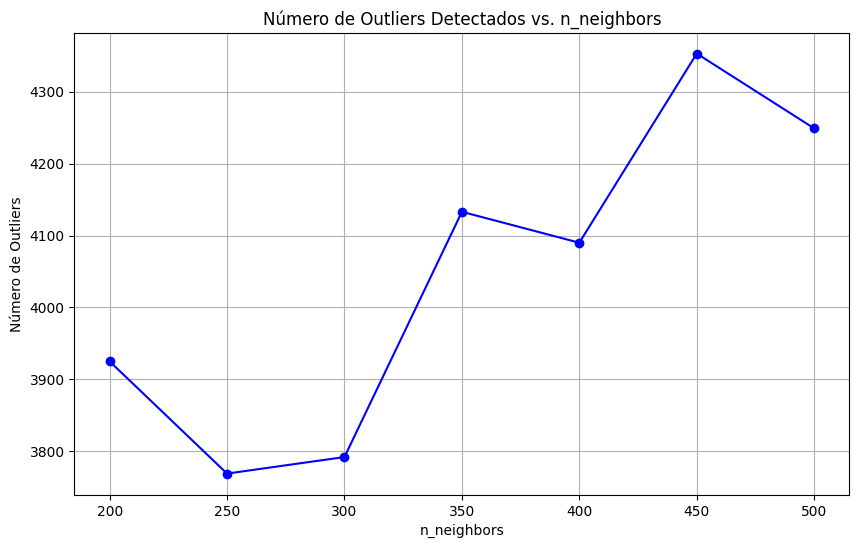

n_neighbors=200 -> Número de outliers: 3925
n_neighbors=250 -> Número de outliers: 3769
n_neighbors=300 -> Número de outliers: 3792
n_neighbors=350 -> Número de outliers: 4133
n_neighbors=400 -> Número de outliers: 4090
n_neighbors=450 -> Número de outliers: 4353
n_neighbors=500 -> Número de outliers: 4249
El valor de n_neighbors con el máximo número de outliers (4353) es: 450


In [ ]:
# Rango de valores para n_neighbors
neighbors_range = range(300, 551, 50)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(internal[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f'n_neighbors={n} -> Número de outliers: {count}')
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)
max_count = outliers_dict[max_n] 

# Imprimir el resultado
print(f'El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}')

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(internal[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]

# Filtrar los valores atípicos en el DataFrame
outlier_values = internal.iloc[outliers]

In [ ]:
# Aplicamos normalización excalando los datos en un rango de 0 a 1
scaler = MinMaxScaler()
internal[numeric_features] = scaler.fit_transform(internal[numeric_features])
internal['Credit_Score'] = scaler.fit_transform(internal[['Credit_Score']])

## 3. Análisis Univariante

**TOTAL_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.15
Std.dev: 0.15

Histograma y Boxplot de Total_TL.


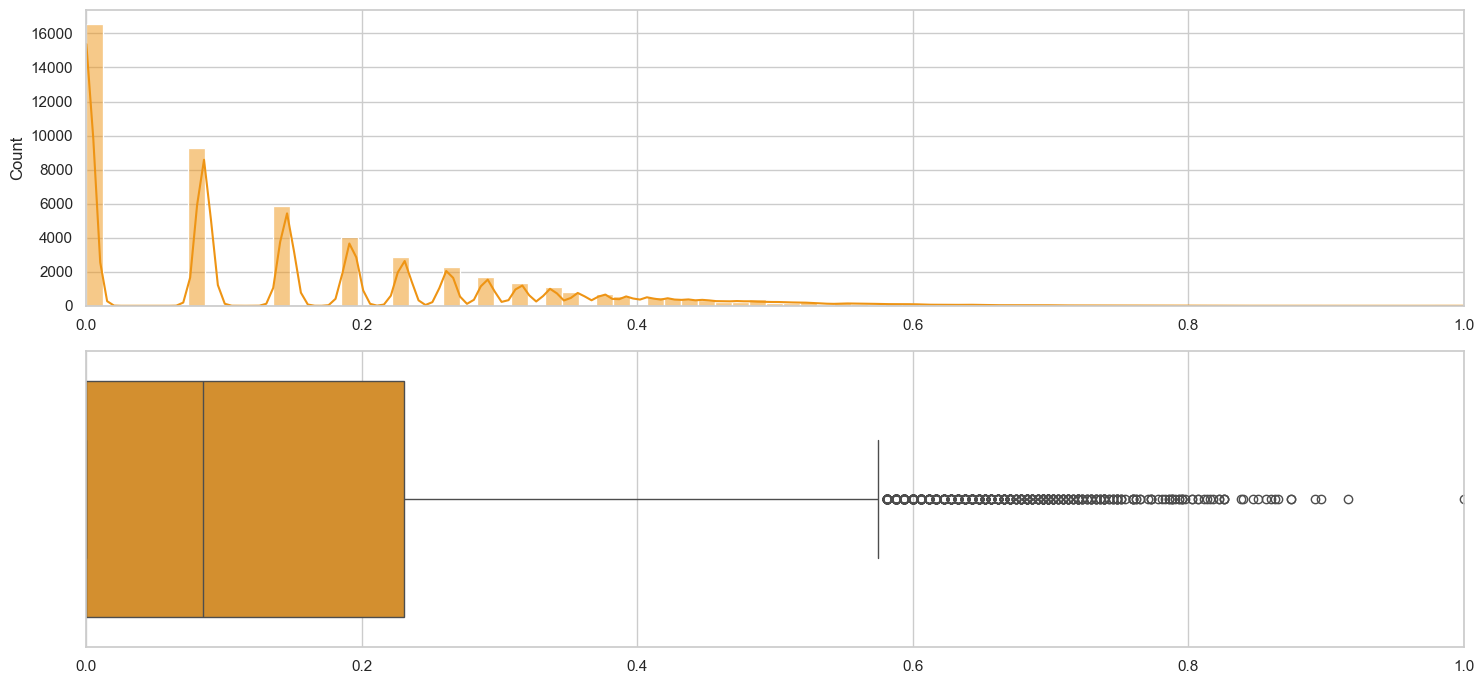

**TOT_CLOSED_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.16
Std.dev: 0.16

Histograma y Boxplot de Tot_Closed_TL.


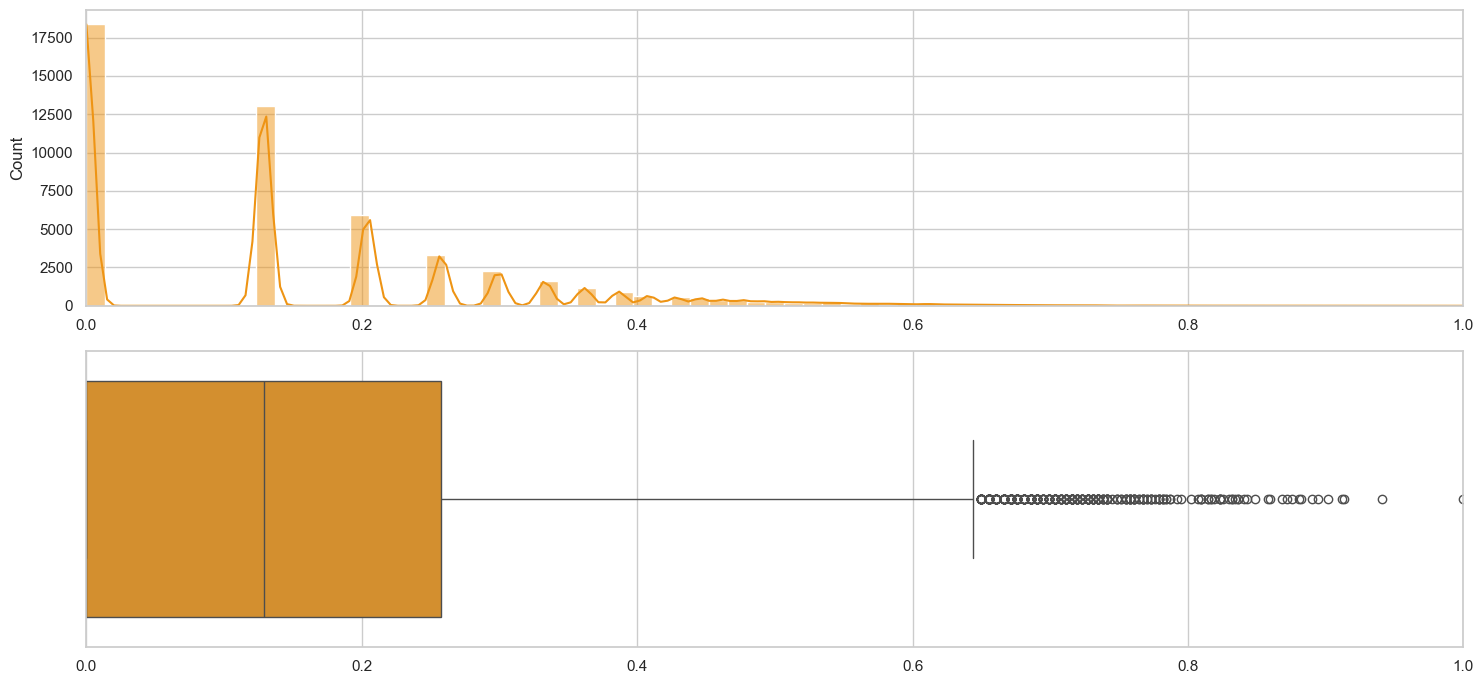

**TOT_ACTIVE_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.24
Std.dev: 0.16

Histograma y Boxplot de Tot_Active_TL.


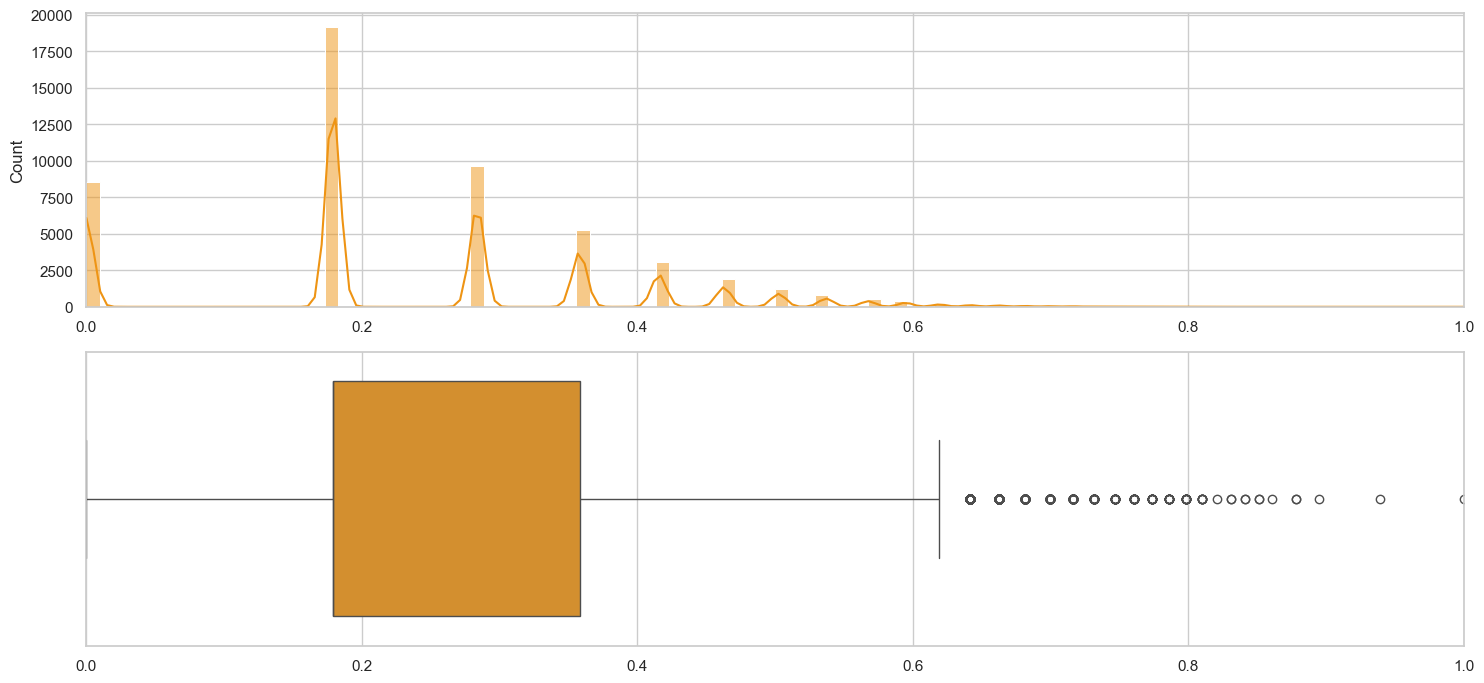

**PCT_ACTIVE_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.57
Std.dev: 0.38

Histograma y Boxplot de pct_active_tl.


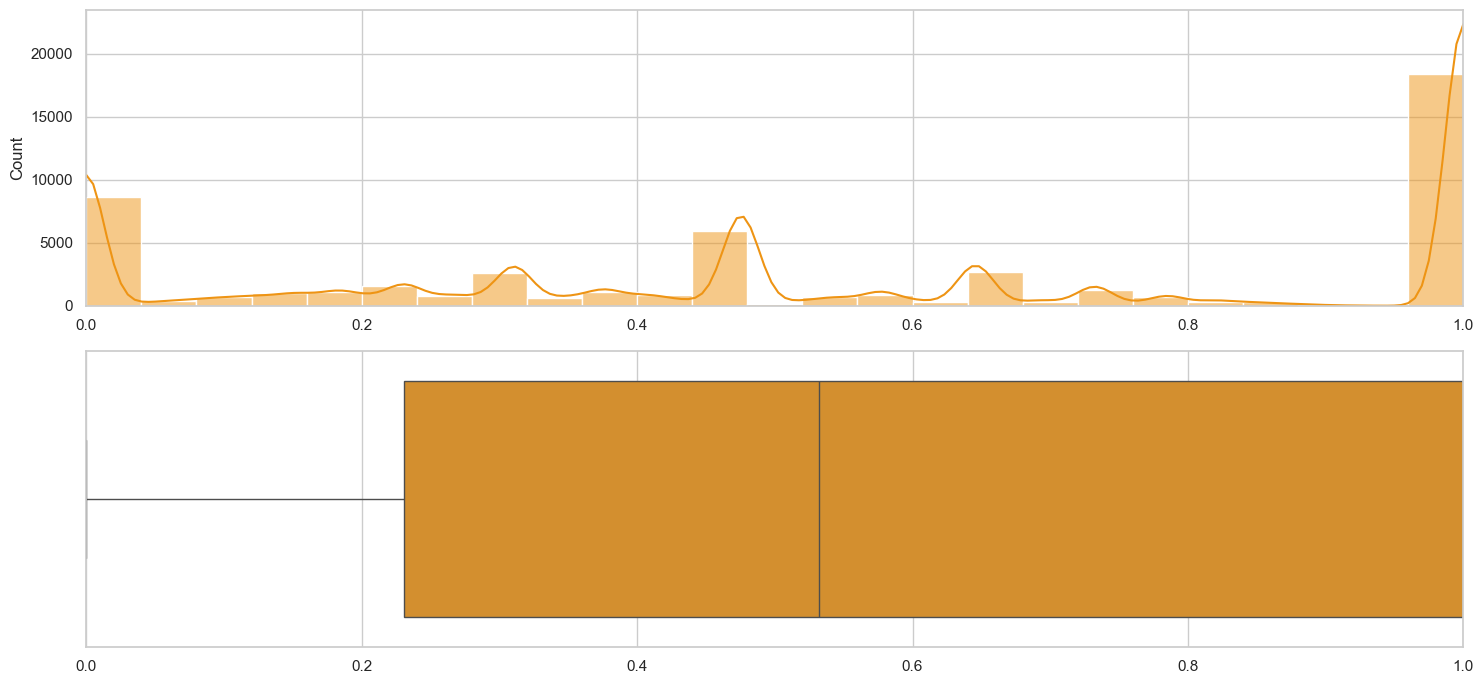

**PCT_CLOSED_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.46
Std.dev: 0.39

Histograma y Boxplot de pct_closed_tl.


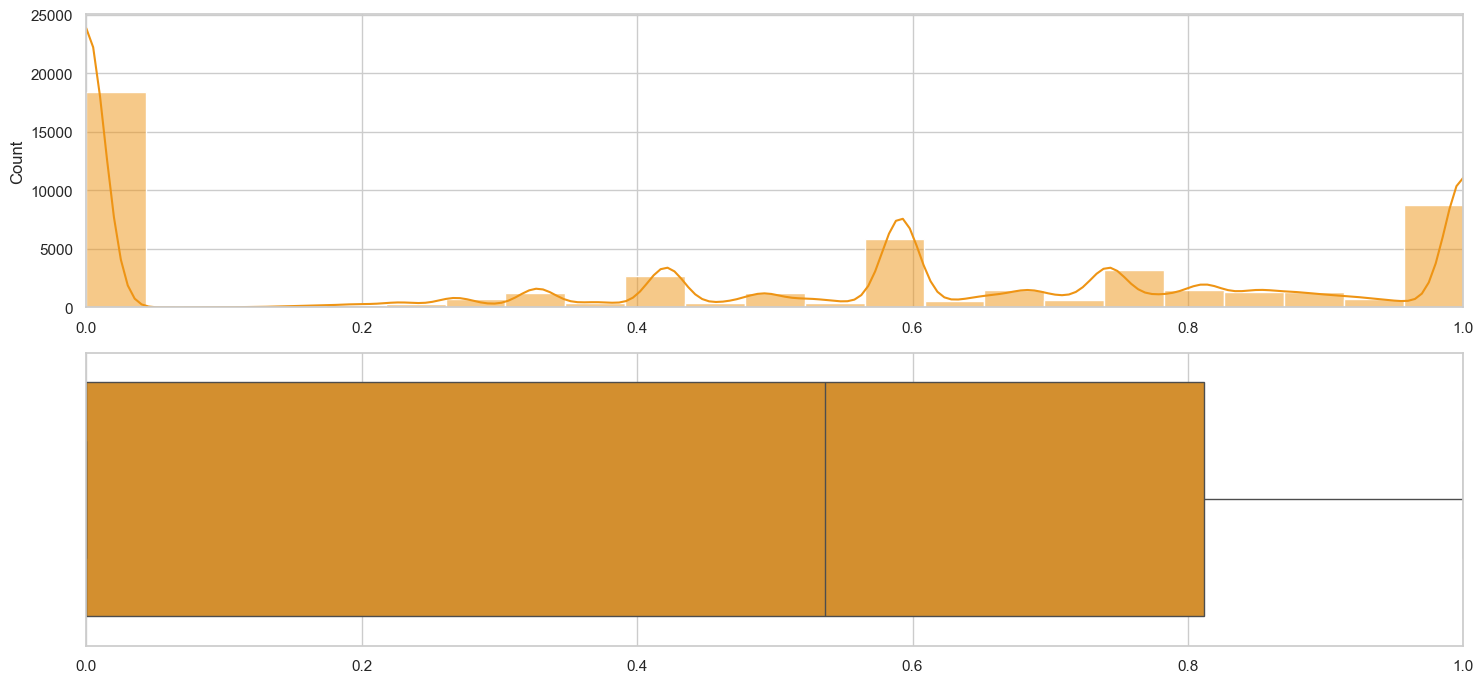

**TOT_MISSED_PMNT**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.08
Std.dev: 0.13

Histograma y Boxplot de Tot_Missed_Pmnt.


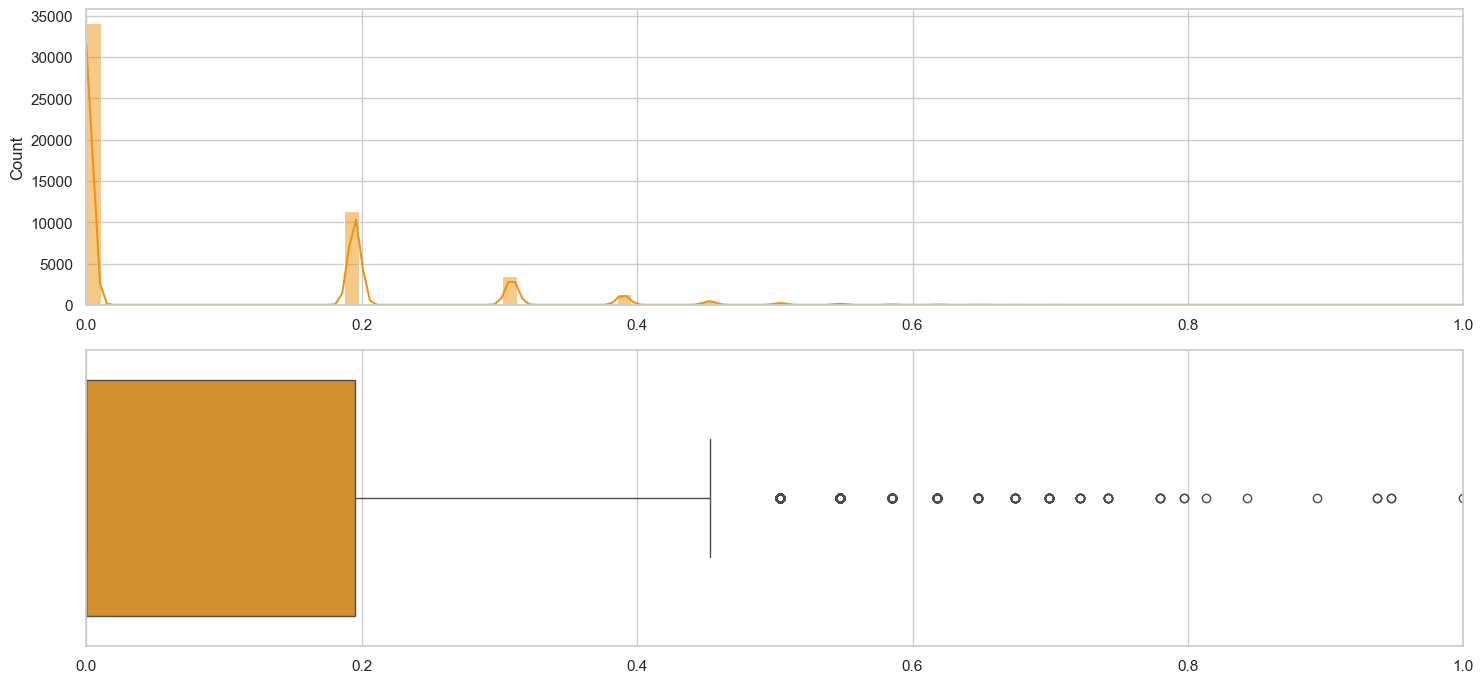

**AUTO_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.11
Std.dev: 0.13

Histograma y Boxplot de Auto_TL.


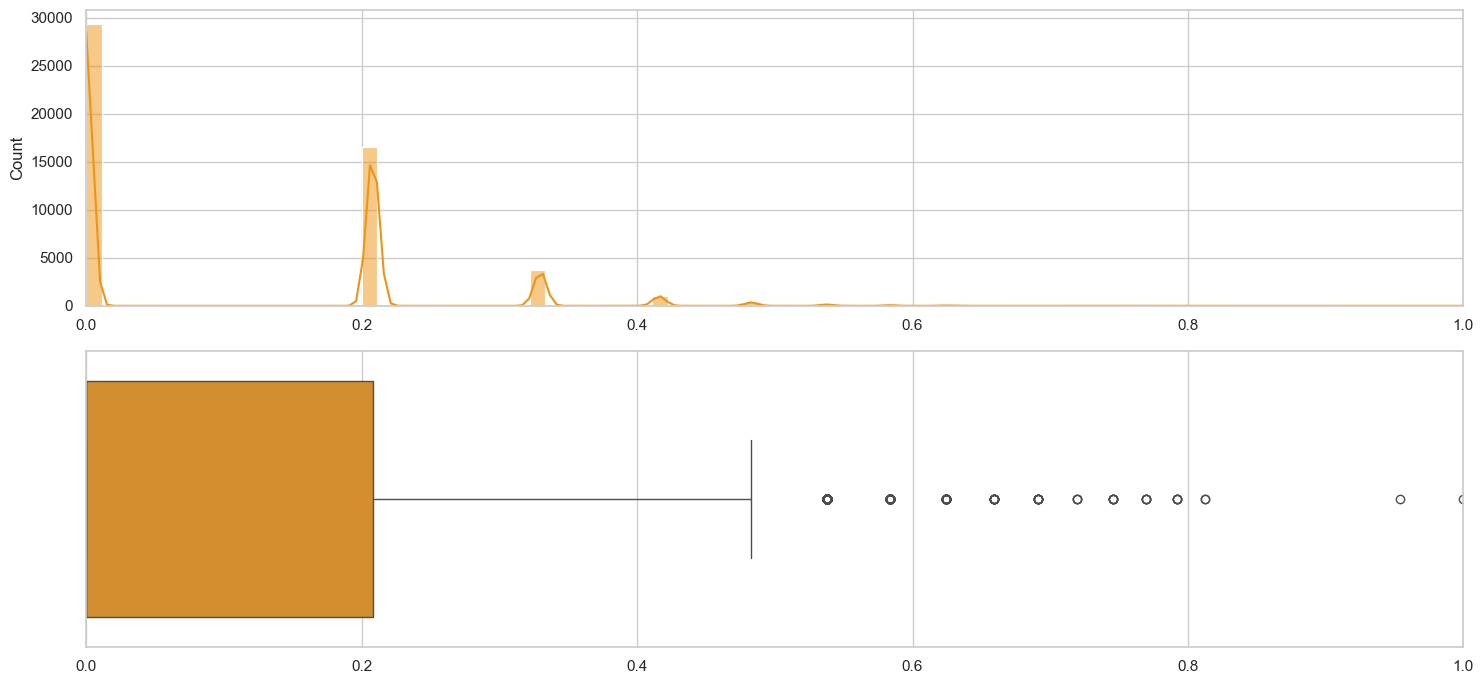

**CC_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.02
Std.dev: 0.07

Histograma y Boxplot de CC_TL.


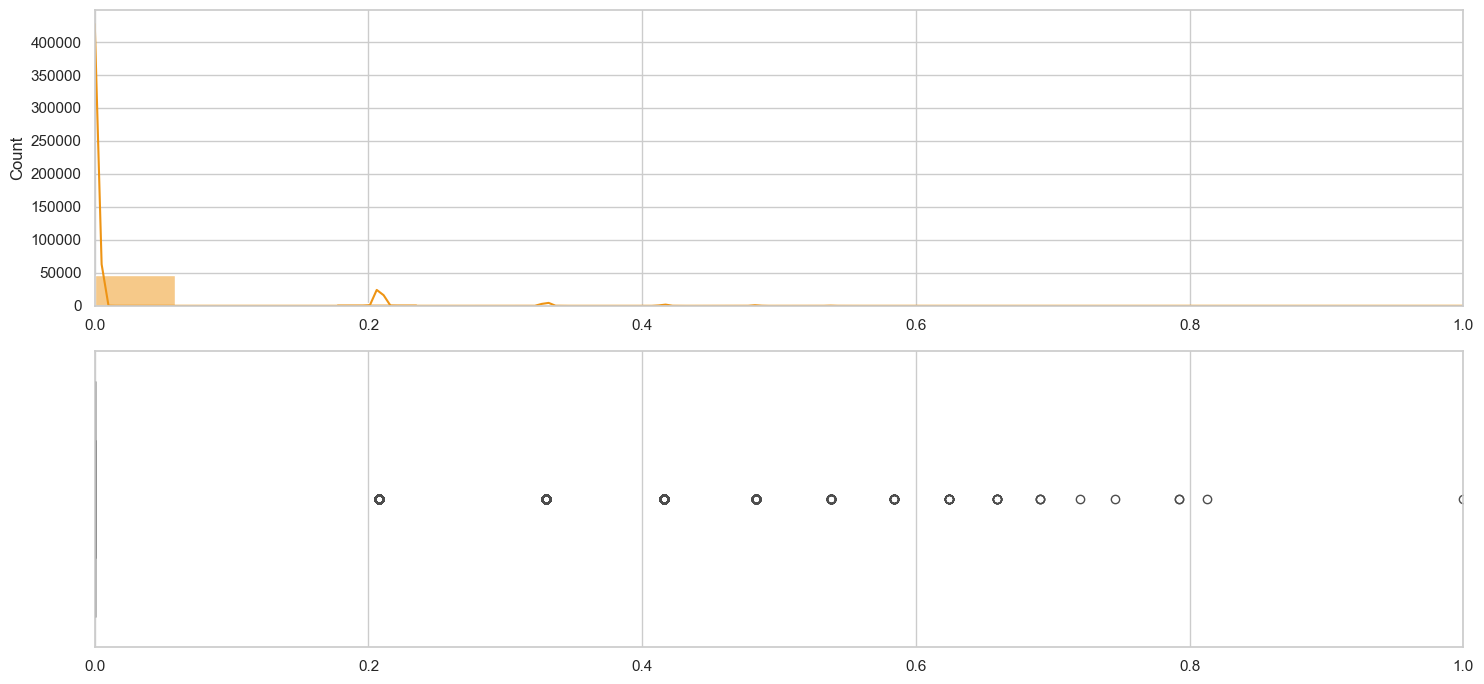

**CONSUMER_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.13
Std.dev: 0.17

Histograma y Boxplot de Consumer_TL.


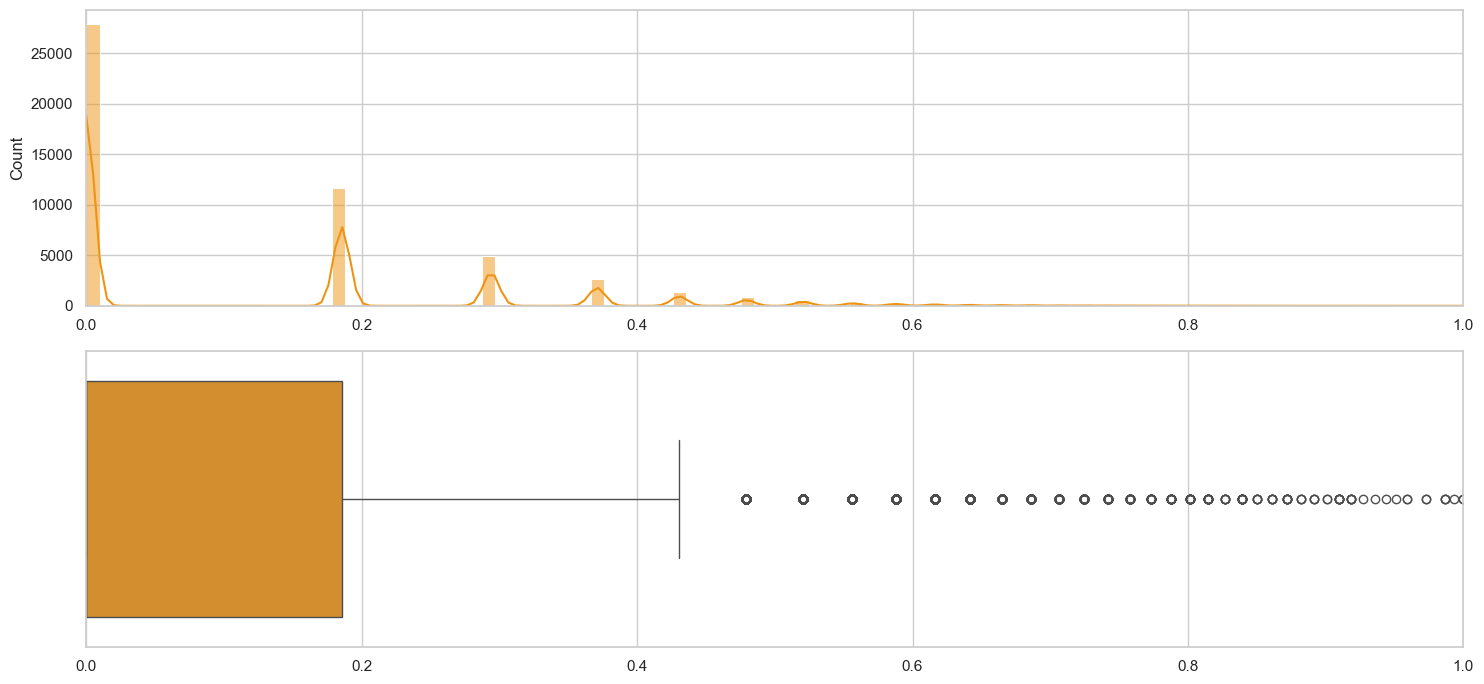

**GOLD_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.08
Std.dev: 0.14

Histograma y Boxplot de Gold_TL.


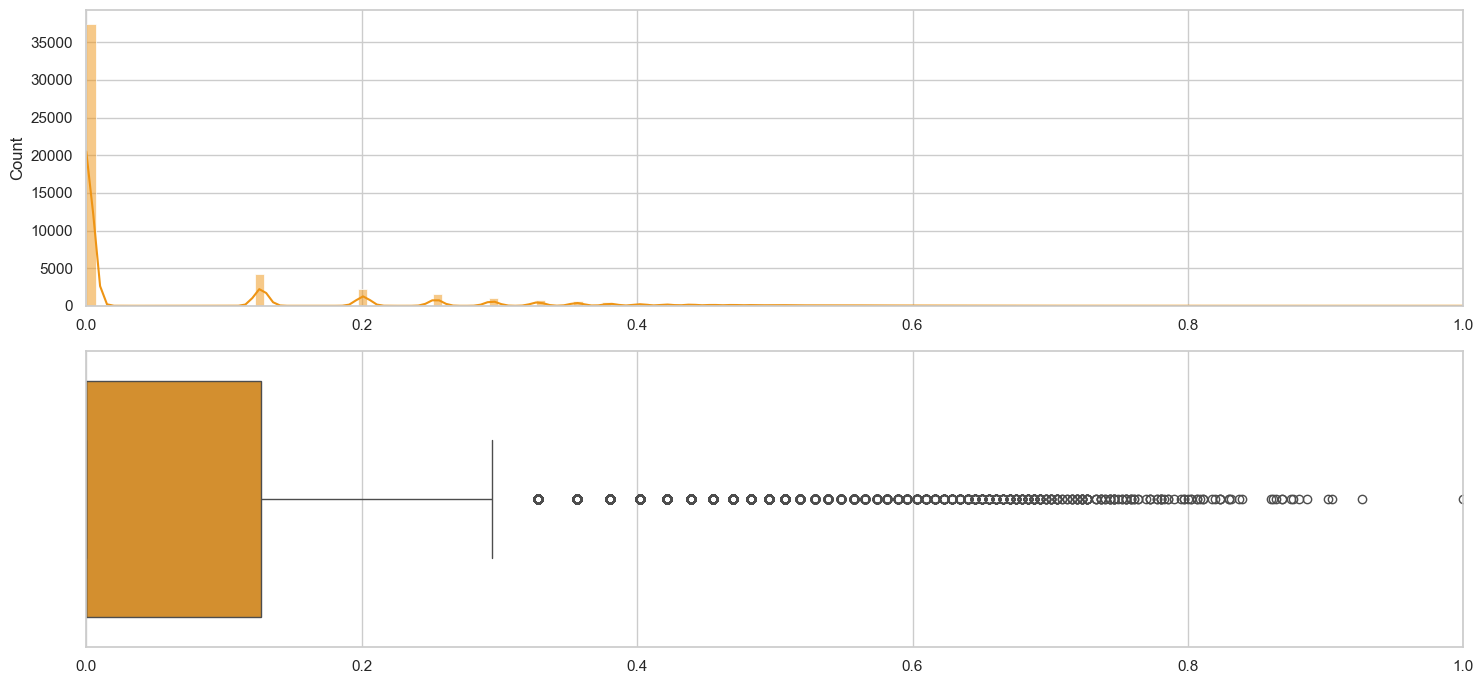

**HOME_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.02
Std.dev: 0.08

Histograma y Boxplot de Home_TL.


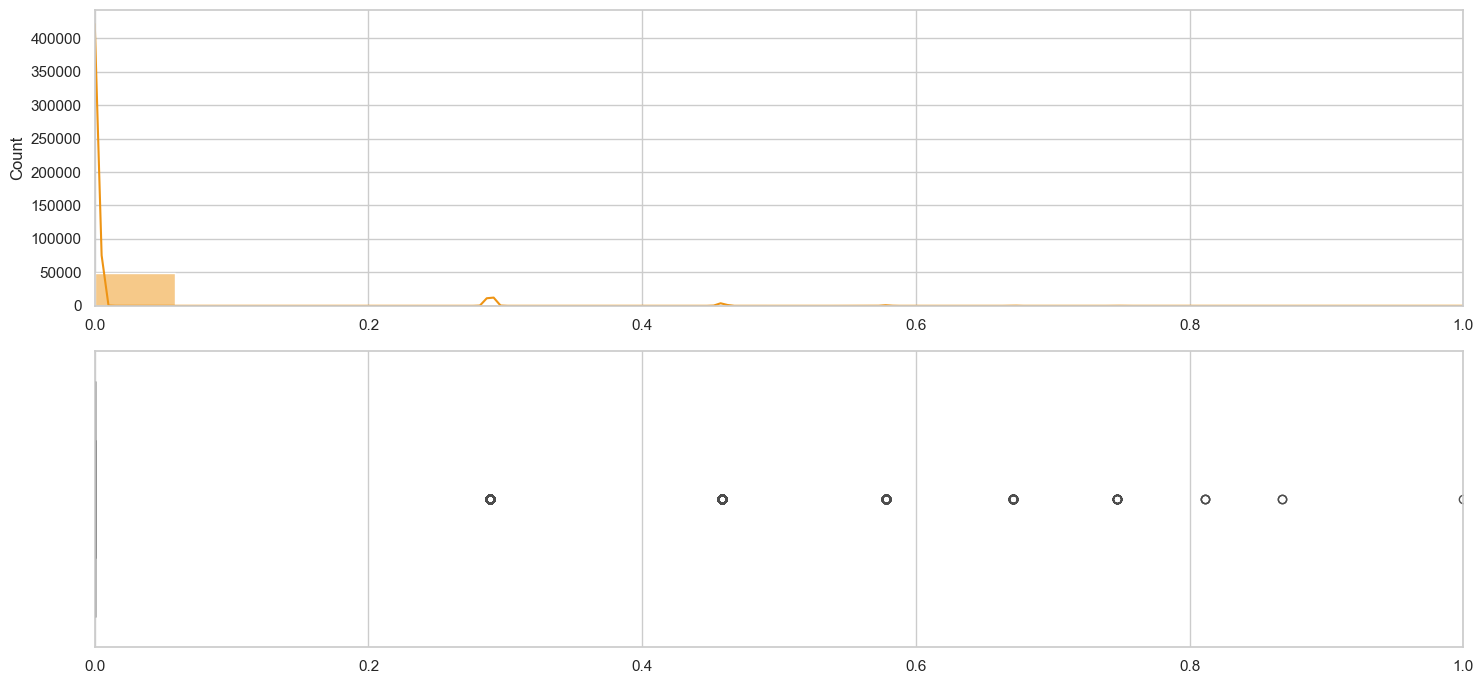

**PL_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.04
Std.dev: 0.11

Histograma y Boxplot de PL_TL.


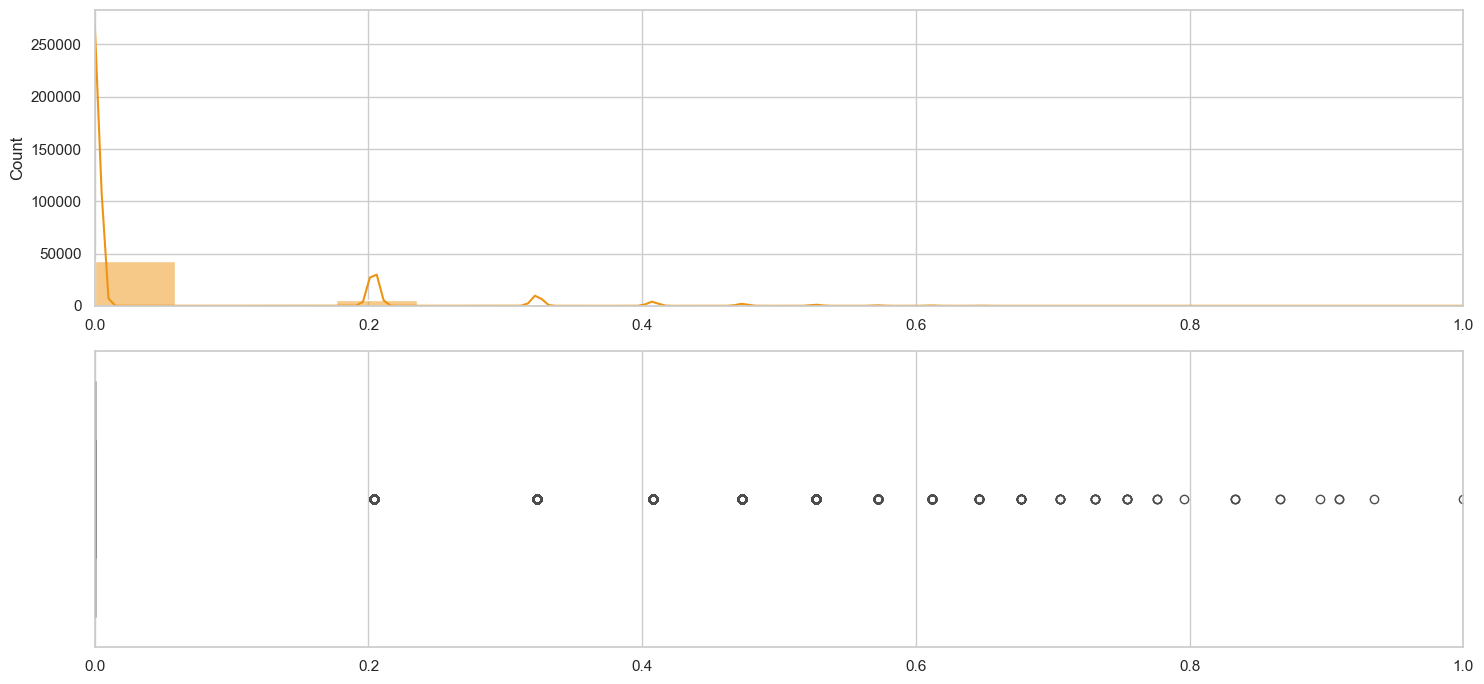

**SECURED_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.16
Std.dev: 0.15

Histograma y Boxplot de Secured_TL.


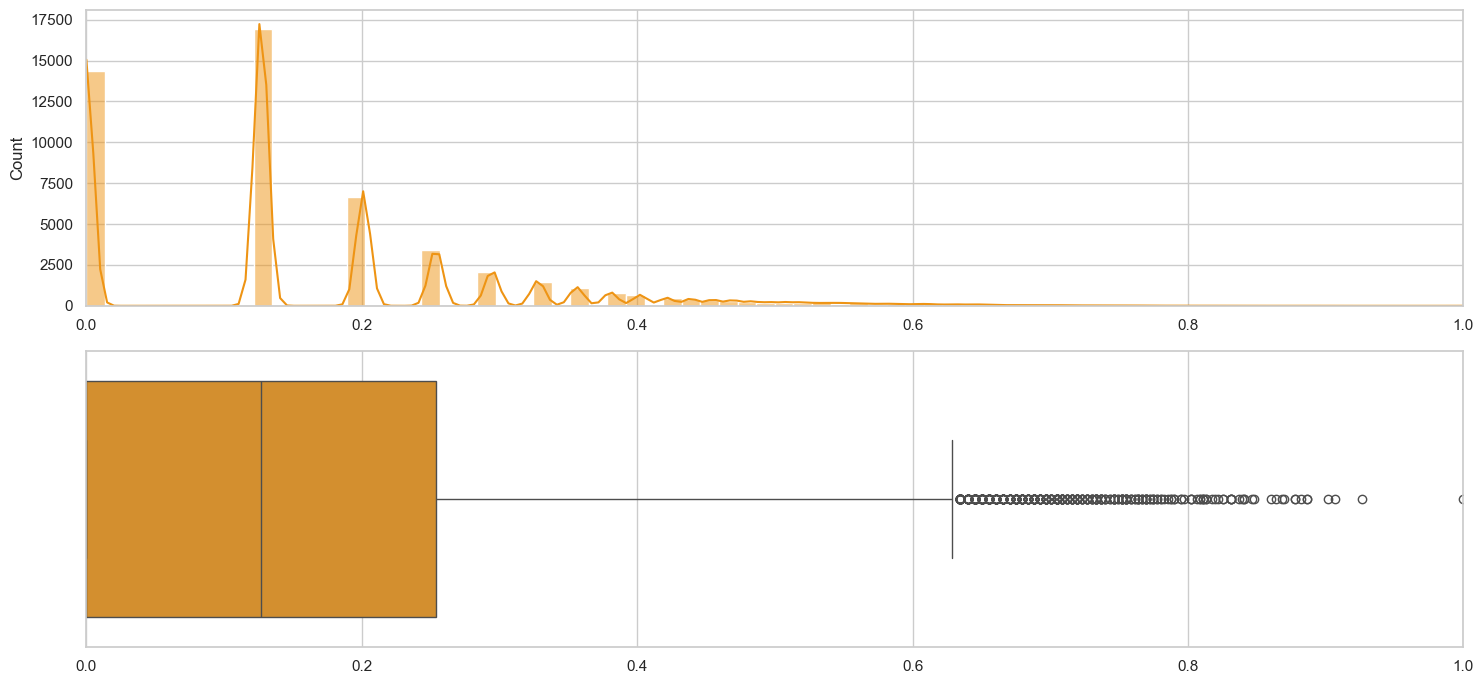

**UNSECURED_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.19
Std.dev: 0.18

Histograma y Boxplot de Unsecured_TL.


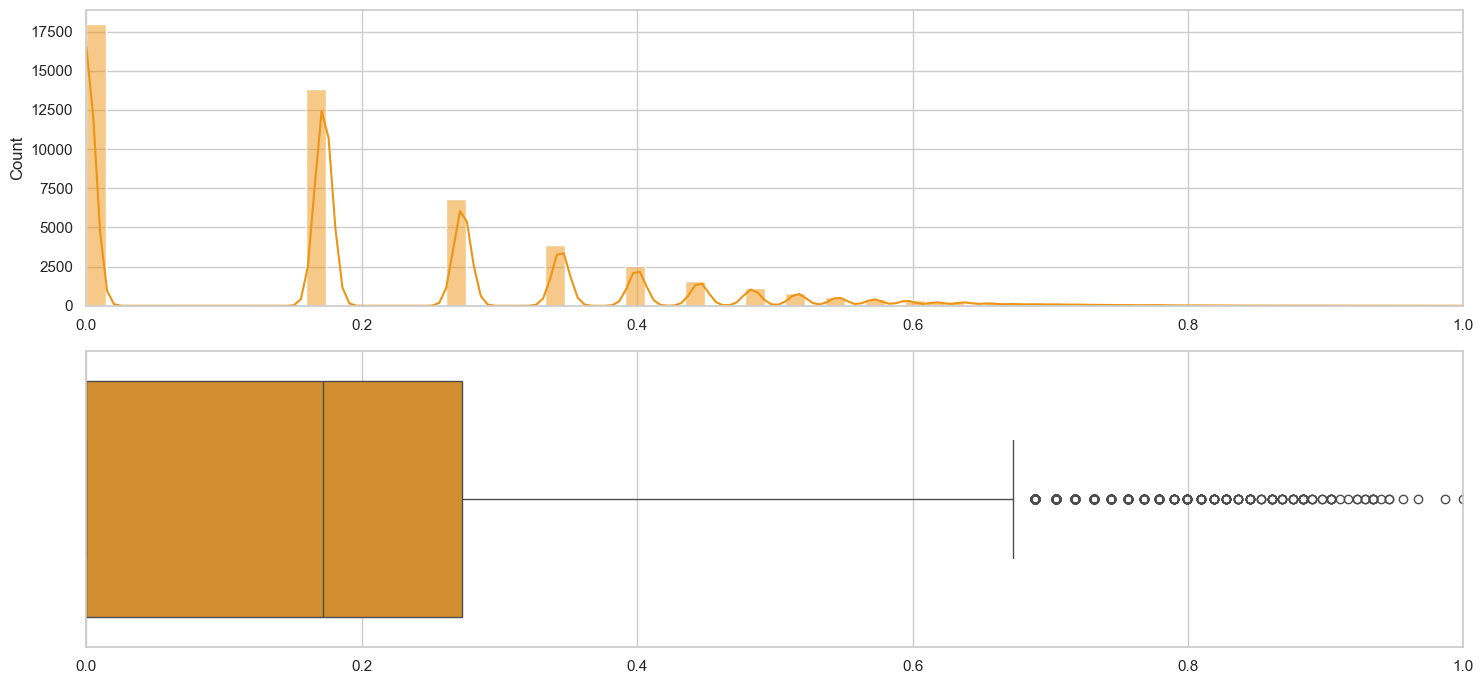

**OTHER_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.11
Std.dev: 0.14

Histograma y Boxplot de Other_TL.


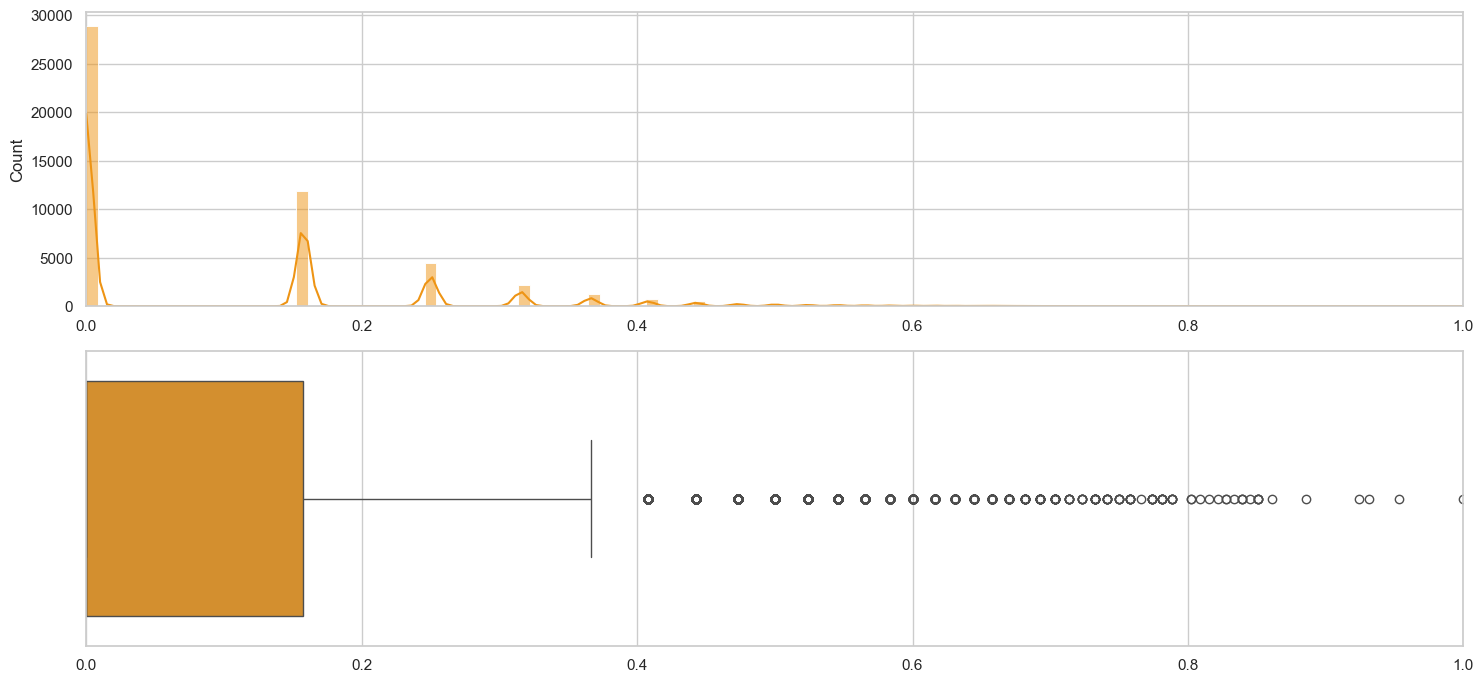

**AGE_OLDEST_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.57
Std.dev: 0.16

Histograma y Boxplot de Age_Oldest_TL.


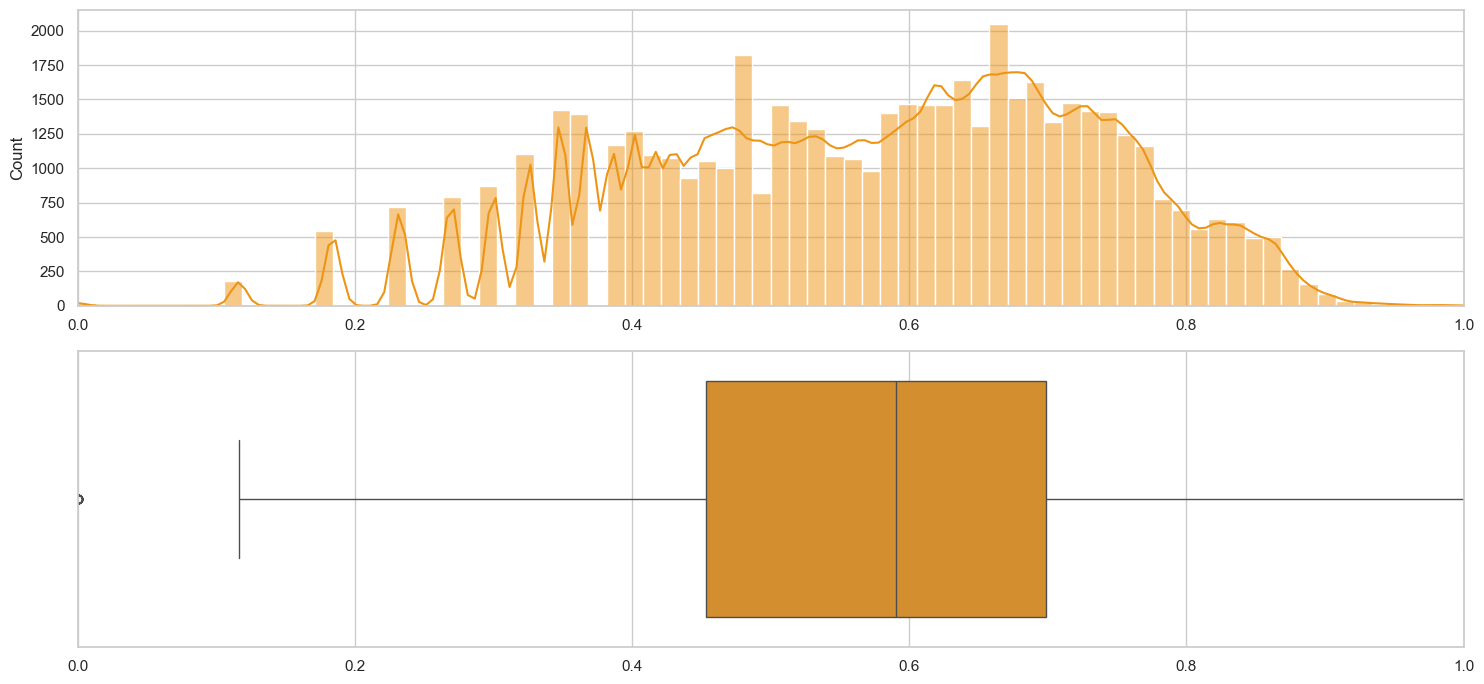

**AGE_NEWEST_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.39
Std.dev: 0.16

Histograma y Boxplot de Age_Newest_TL.


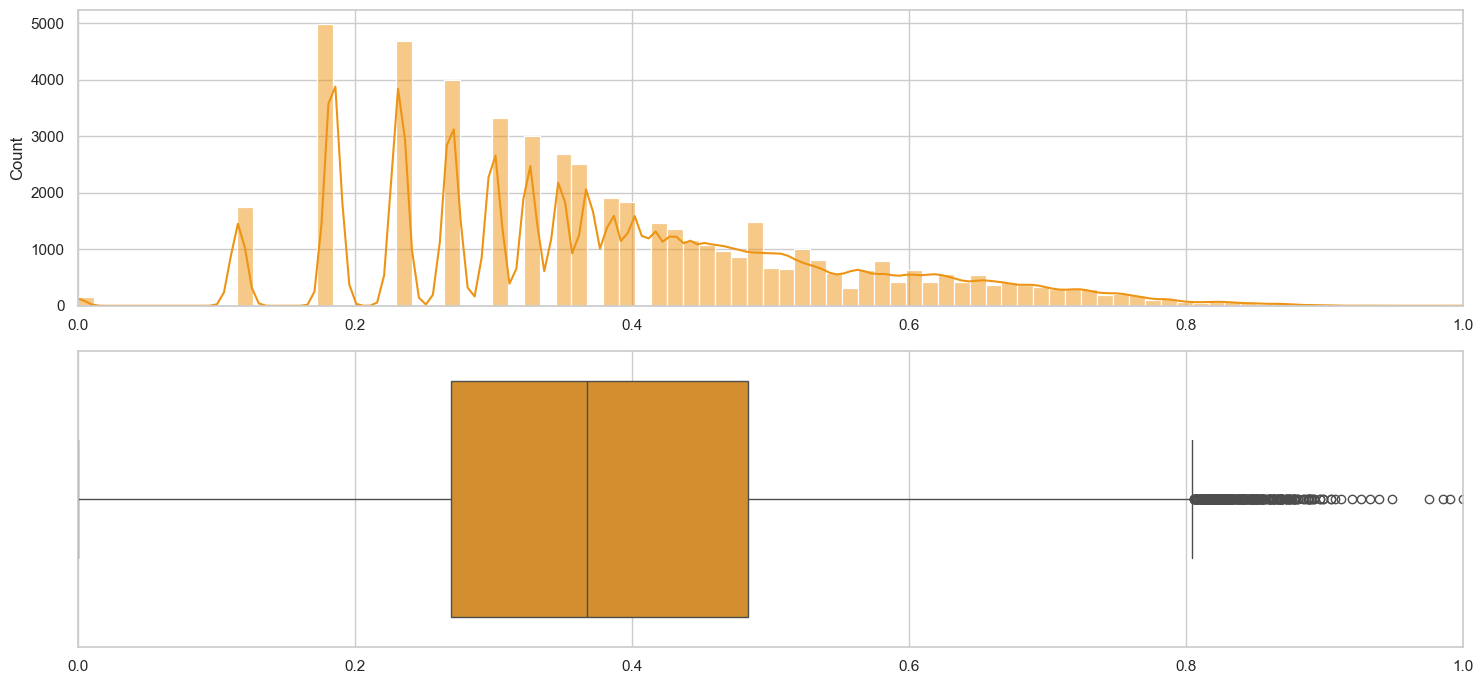

**TOTAL_TL_OPENED_PCA**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.28
Std.dev: 0.24

Histograma y Boxplot de Total_TL_opened_pca.


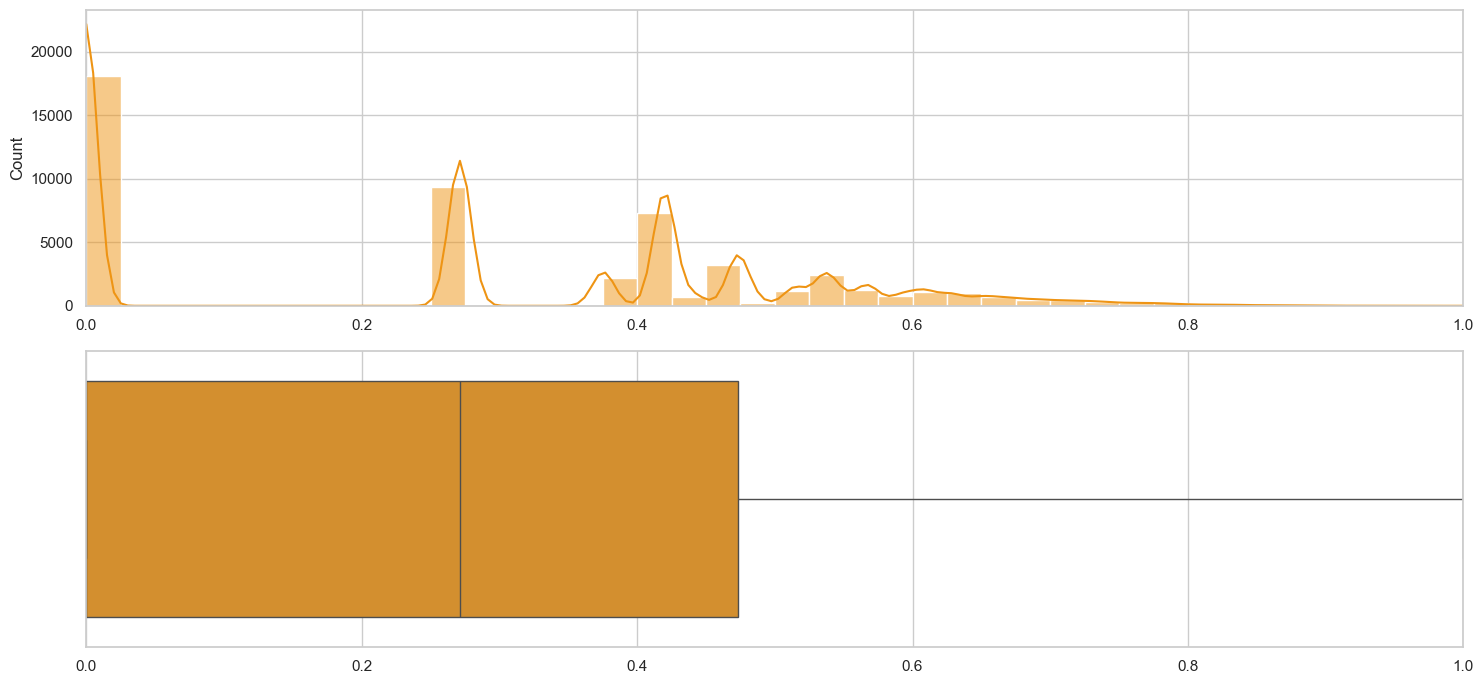

**TOT_TL_CLOSED_PCA**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.13
Std.dev: 0.19

Histograma y Boxplot de Tot_TL_closed_pca.


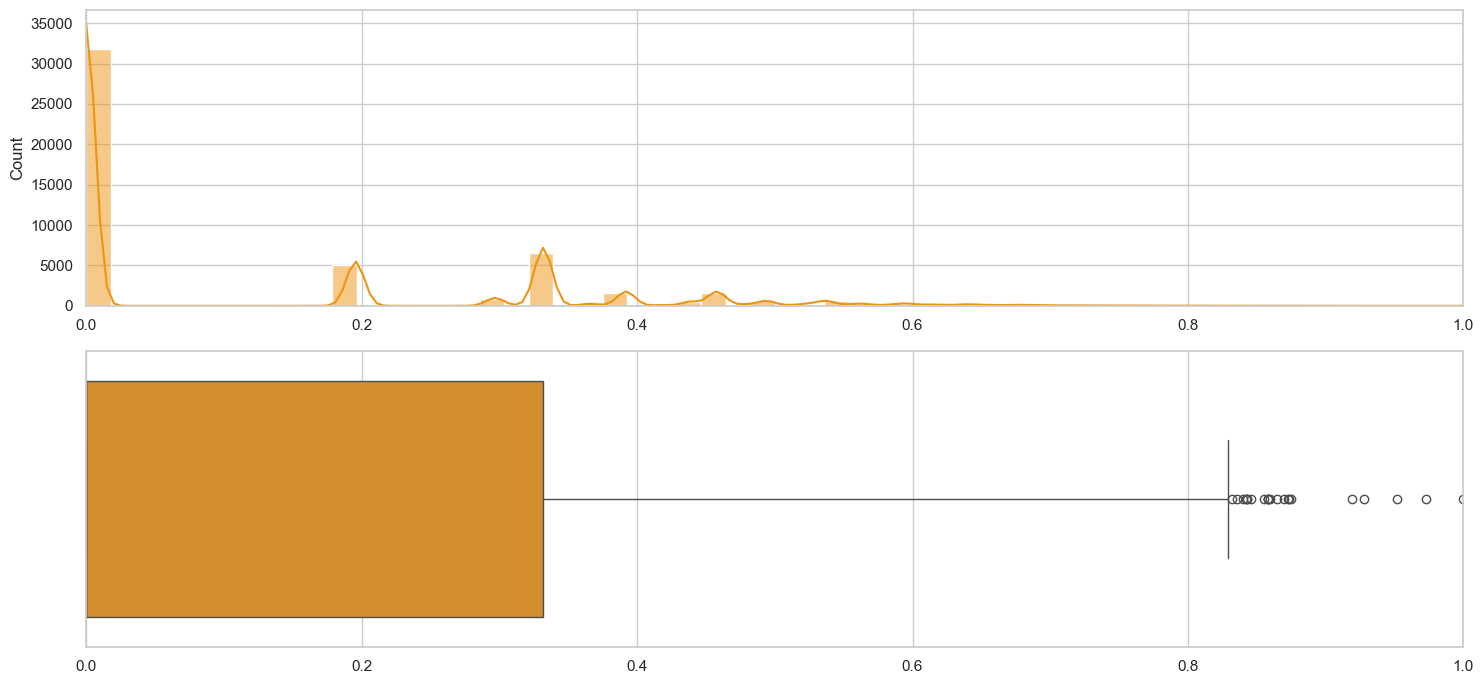

**PCT_TL_OPEN_PCA**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.38
Std.dev: 0.35

Histograma y Boxplot de pct_tl_open_pca.


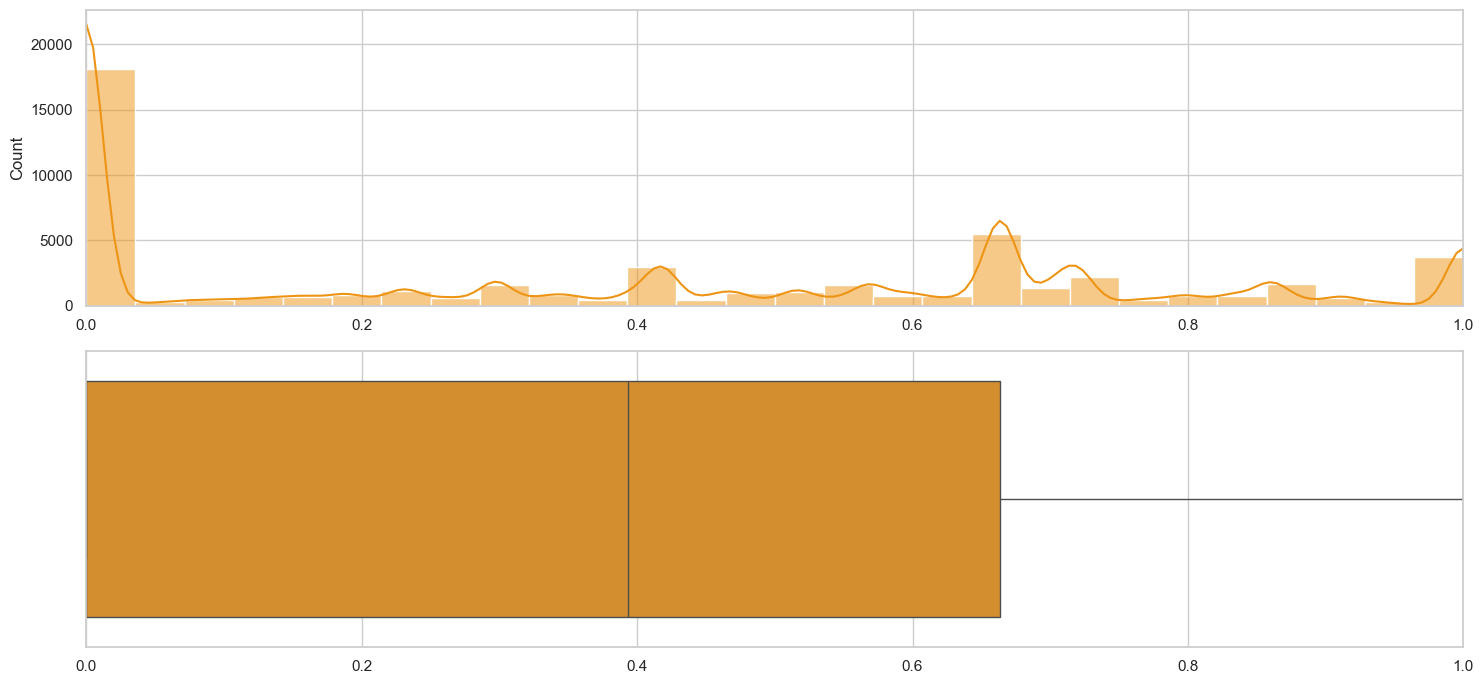

**PCT_TL_CLOSED_PCA**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.22
Std.dev: 0.31

Histograma y Boxplot de pct_tl_closed_pca.


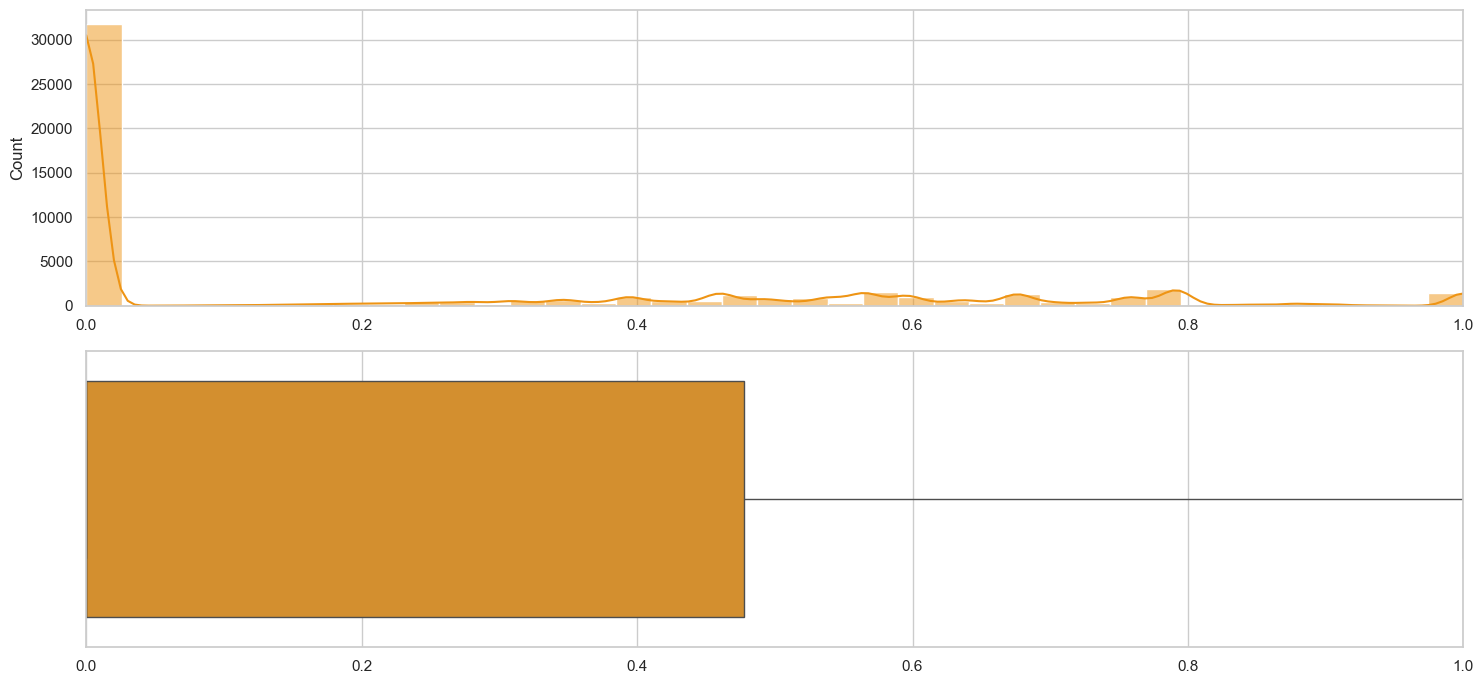

In [21]:
# Itera sobre las varáibles numericas para aplicar la función
for v_num in numeric_features:
    Count_Quant(internal, v_num)

## 4. Análisis Bivariante

### 4.1. Estudio de las correlaciones

Para el análisis de las correlaciones, emplearemos dos métodos distintos. En primer lugar, utilizaremos la correlación de Pearson, que nos permitirá identificar las relaciones lineales entre las variables. Posteriormente, recurriremos al método de Spearman, el cual es más adecuado para detectar relaciones no lineales. Con el fin de controlar las posibles multicolinealidades, aplicaremos un filtro moderado, estableciendo un umbral de 0.85, para evitar la presencia de correlaciones excesivas que puedan distorsionar los resultados del modelo.

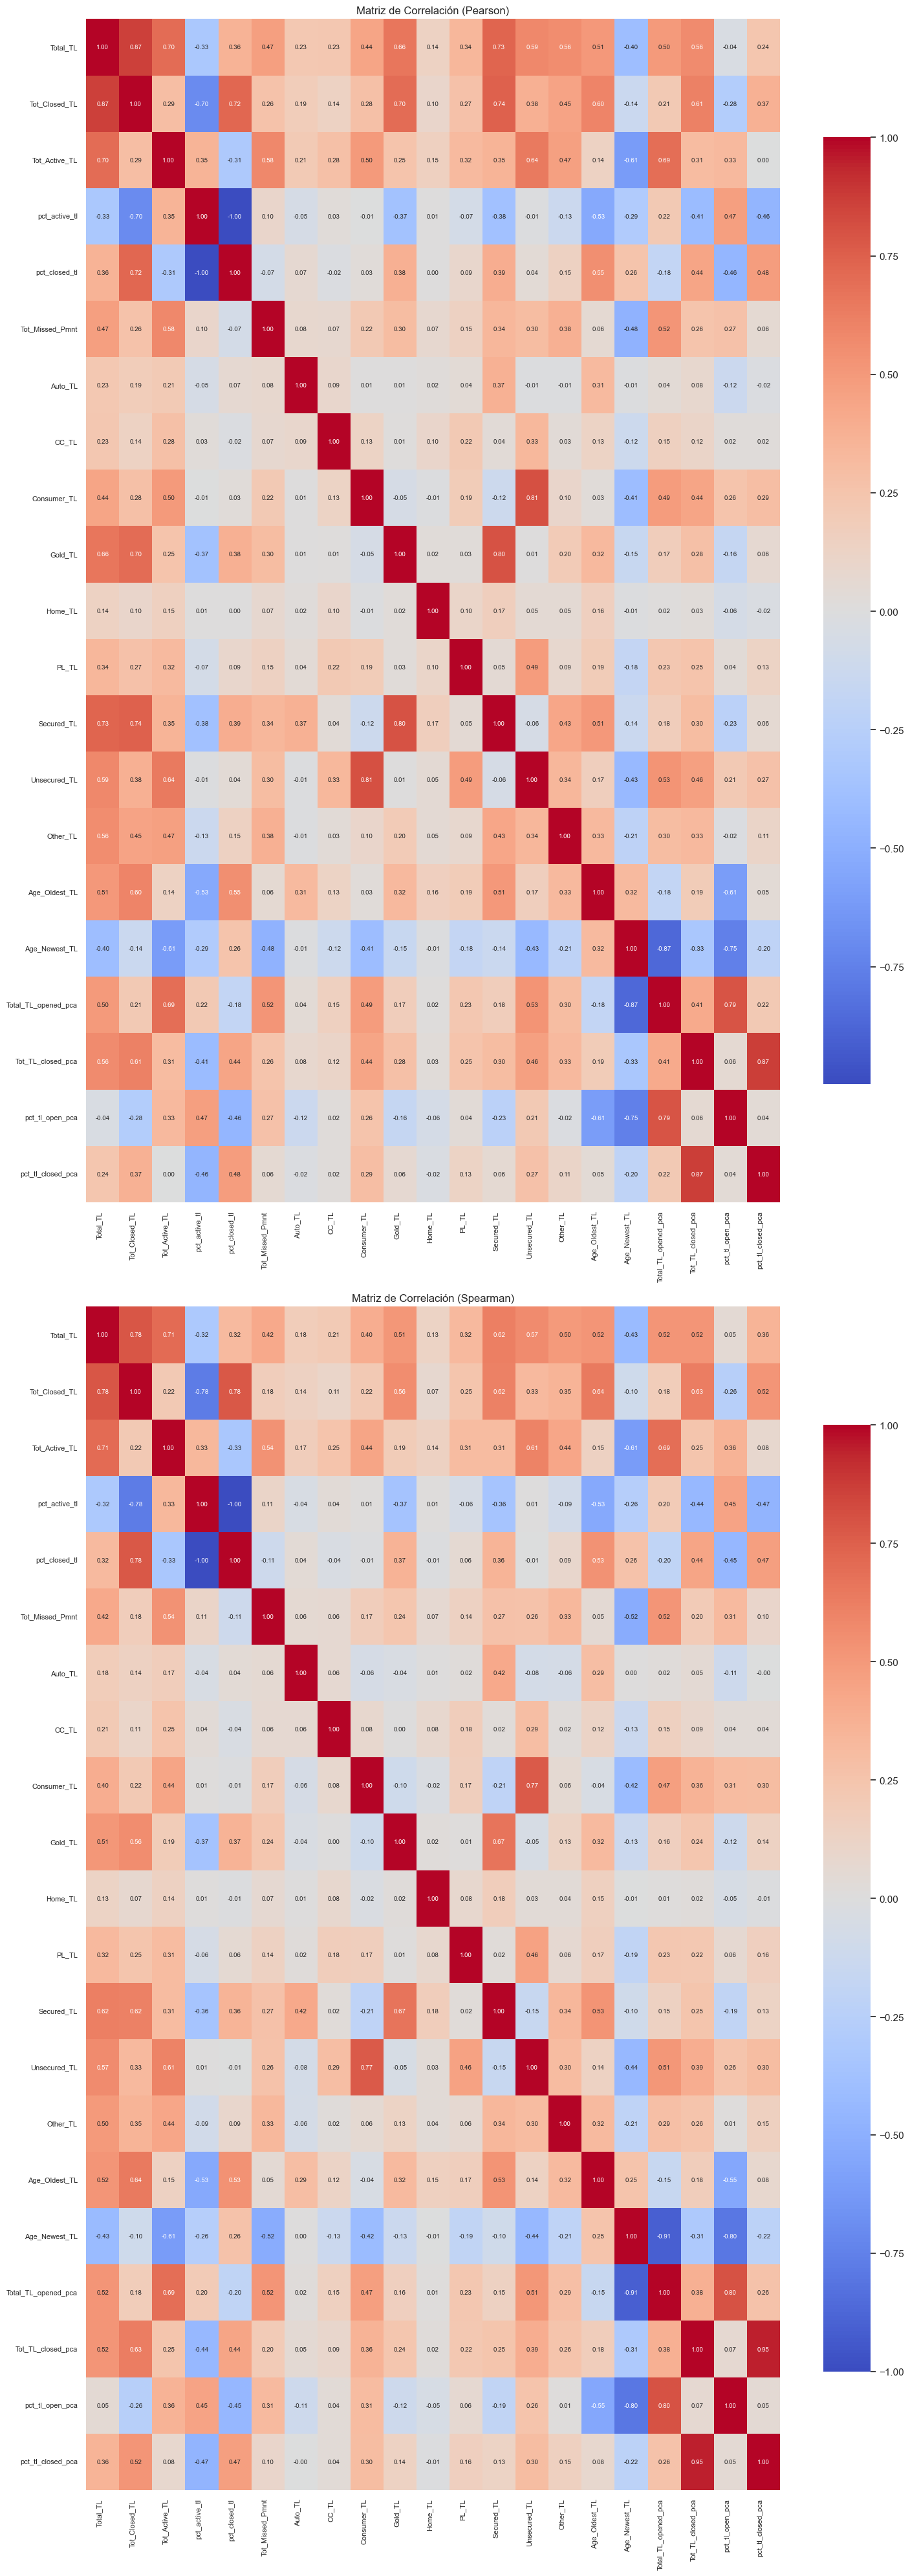

In [22]:
# Lista de métodos de correlación
methods = ['pearson', 'spearman']

# Configuración de la figura: 3 filas, 1 columna
fig, axes = plt.subplots(2, 1, figsize=(15, 40), sharey=True)

# Iterar sobre los métodos y generar las matrices de correlación
for i, method in enumerate(methods):
    # Calcular la matriz de correlación
    correlation_matrix = internal[numeric_features].corr(method=method)
    
    # Crear el heatmap
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap='coolwarm', 
        fmt='.2f', 
        ax=axes[i], 
        annot_kws={'size': 7}, 
        cbar_kws={'shrink': 0.8} 
    )
    
    # Personalizar etiquetas de los ejes
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=8)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0, fontsize=8)
    axes[i].set_title(f'Matriz de Correlación ({method.capitalize()})', fontsize=12)

# Ajustar el diseño general de la figura
plt.tight_layout()

# Mostrar la figura
plt.show()

In [23]:
# Definir el umbral de correlación y lista de métodos
threshold = 0.79
methods = ['pearson', 'spearman']

# Crear una máscara de correlaciones combinadas
correlation_matrix = np.zeros((len(numeric_features), len(numeric_features)))

for met in methods:
    corr_mat = internal[numeric_features].corr(method=met).abs()
    correlation_matrix = np.maximum(correlation_matrix, corr_mat)

# Crear DataFrame de la matriz combinada
correlation_df = pd.DataFrame(correlation_matrix, index=numeric_features, columns=numeric_features)

# Identificar y eliminar columnas con alta correlación
columns_to_drop = set()
while True:
    # Encontrar la variable con más correlaciones altas
    high_corr = (correlation_df > threshold) & (correlation_df != 1.0)
    high_corr_sum = high_corr.sum().sort_values(ascending=False)

    if high_corr_sum.max() == 0:
        break

    # Eliminar la variable más problemática (con más correlaciones altas)
    col_to_remove = high_corr_sum.idxmax()
    columns_to_drop.add(col_to_remove)
    
    # Eliminar la columna y fila de la matriz de correlación
    correlation_df.drop(index=col_to_remove, columns=col_to_remove, inplace=True)

print(f'Tamaño original: {internal.shape}')
print(f'Columnas a eliminar: {columns_to_drop}')

# Eliminar columnas en el DataFrame
internal = internal.drop(columns=columns_to_drop)

print(f'Tamaño después de filtrar: {internal.shape}')

Tamaño original: (51336, 23)
Columnas a eliminar: {'Consumer_TL', 'Total_TL', 'Age_Newest_TL', 'pct_tl_closed_pca', 'Gold_TL', 'Total_TL_opened_pca'}
Tamaño después de filtrar: (51336, 17)


### 4.2. Target VS Variables Independientes

In [24]:
# Volvemos a crear la variable que recoge las características numéricas
numeric_features = internal.drop(['PROSPECTID', 'Credit_Score'], axis=1).columns

Análisis de variables numéricas respecto a la columna objetivo 'Credit_Score':



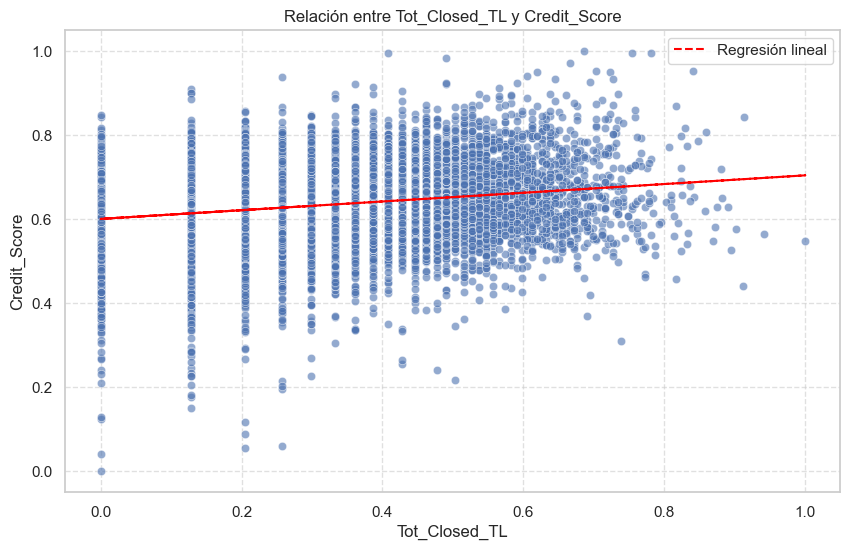

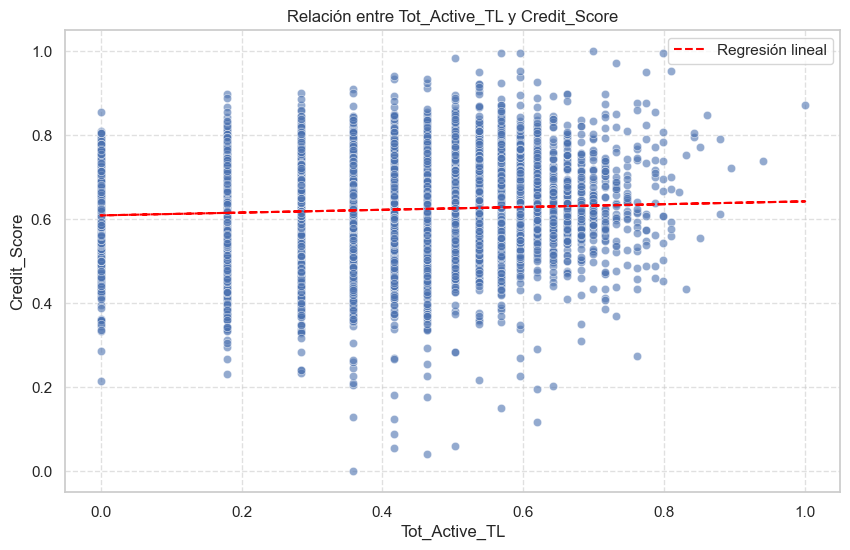

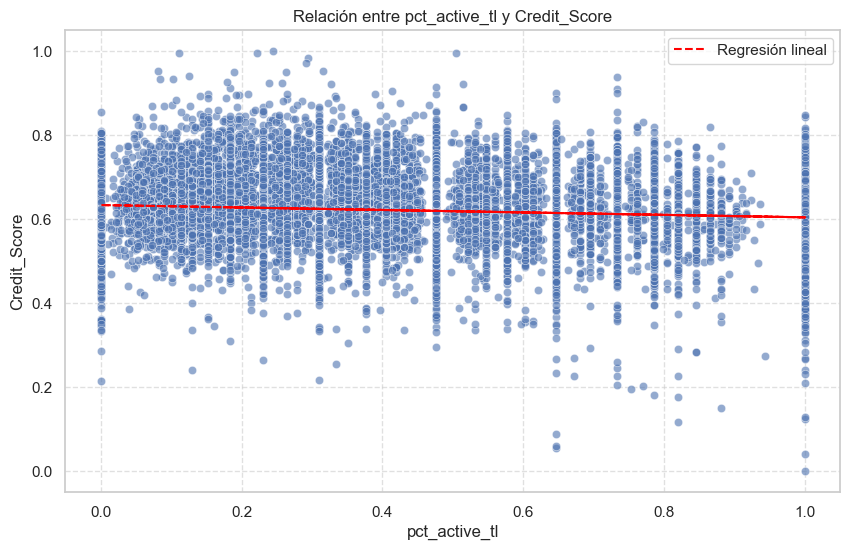

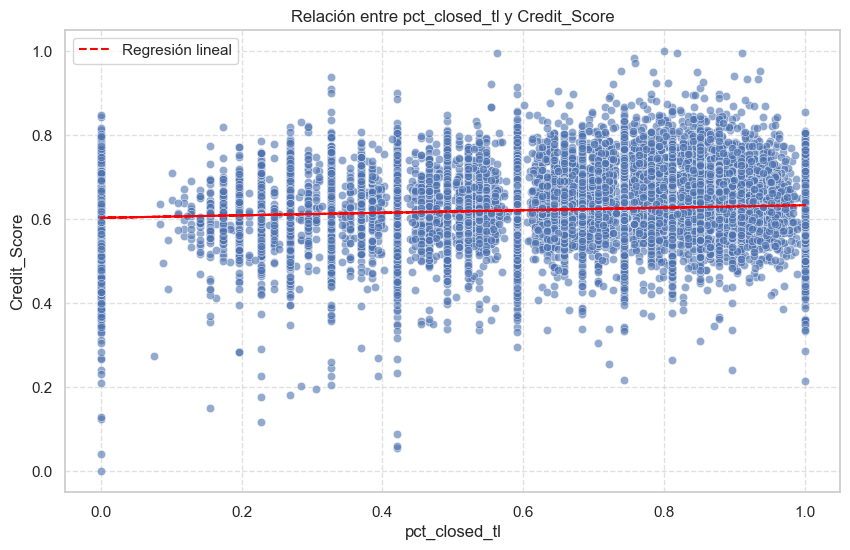

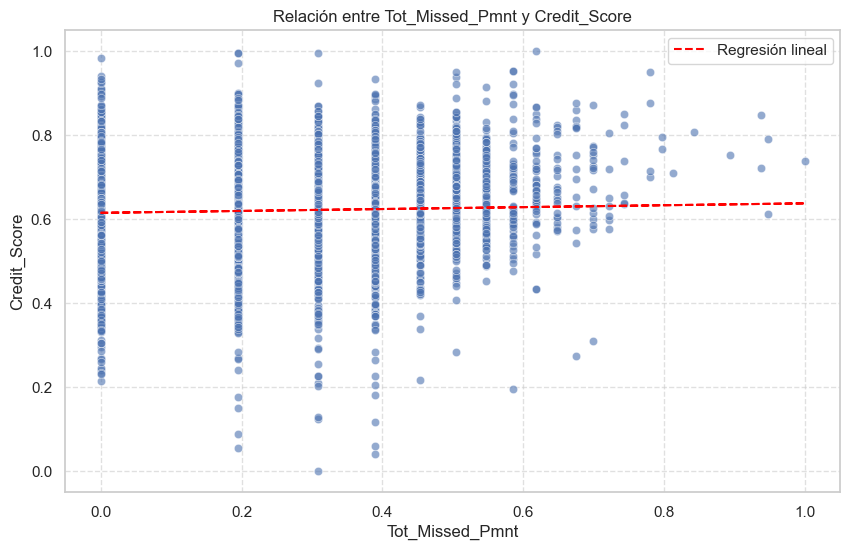

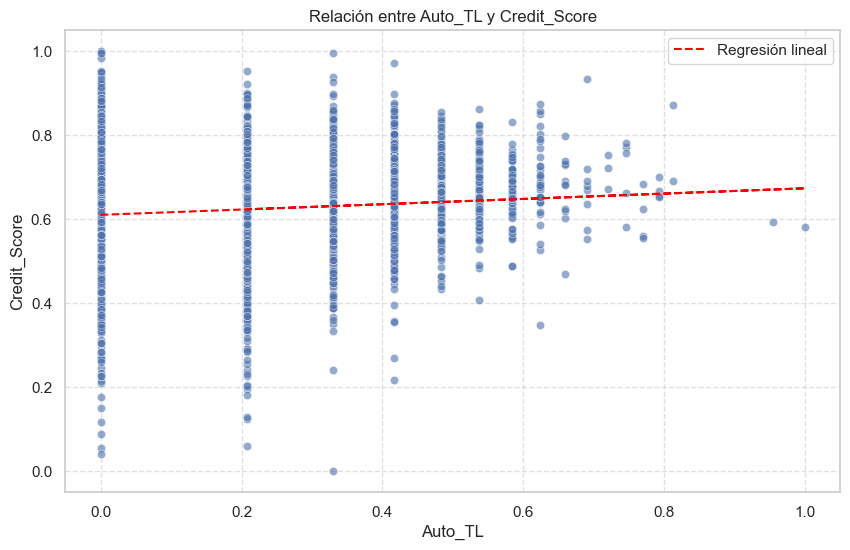

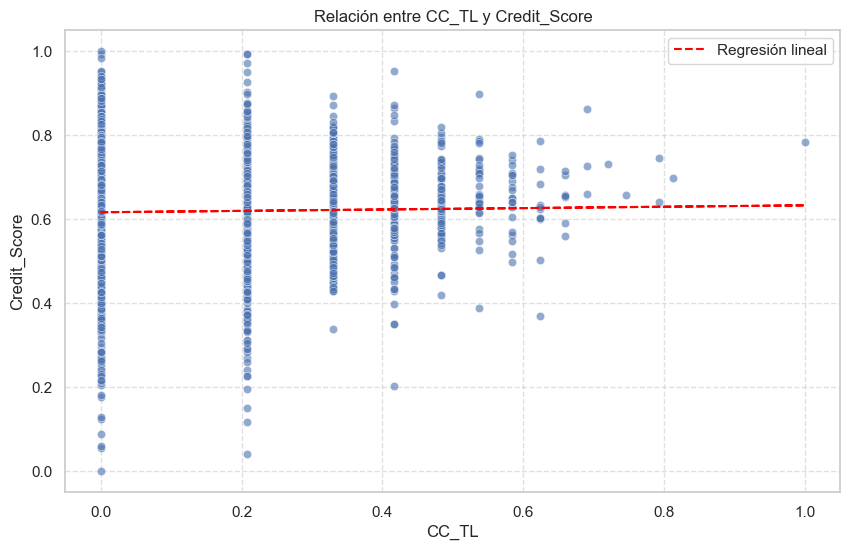

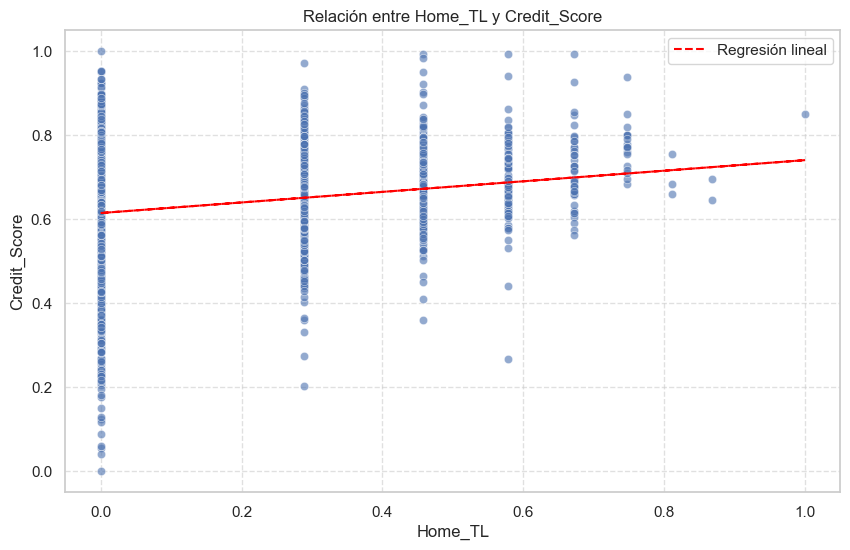

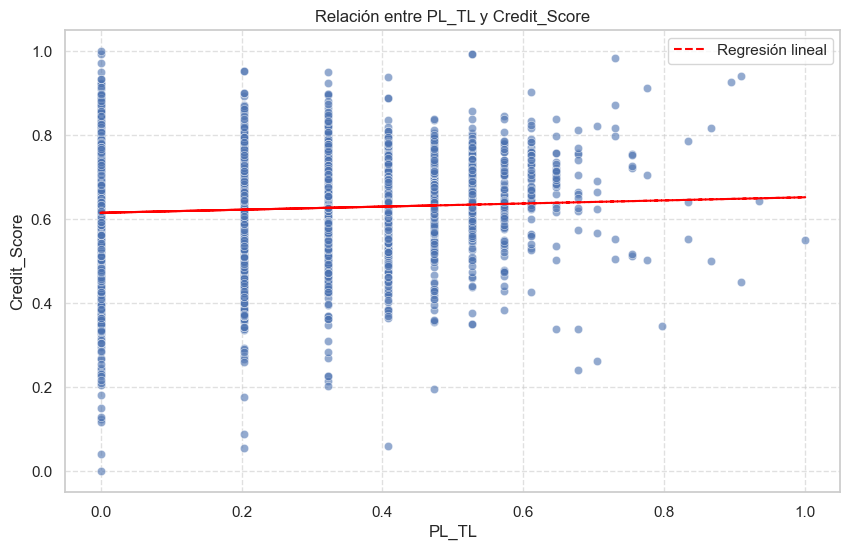

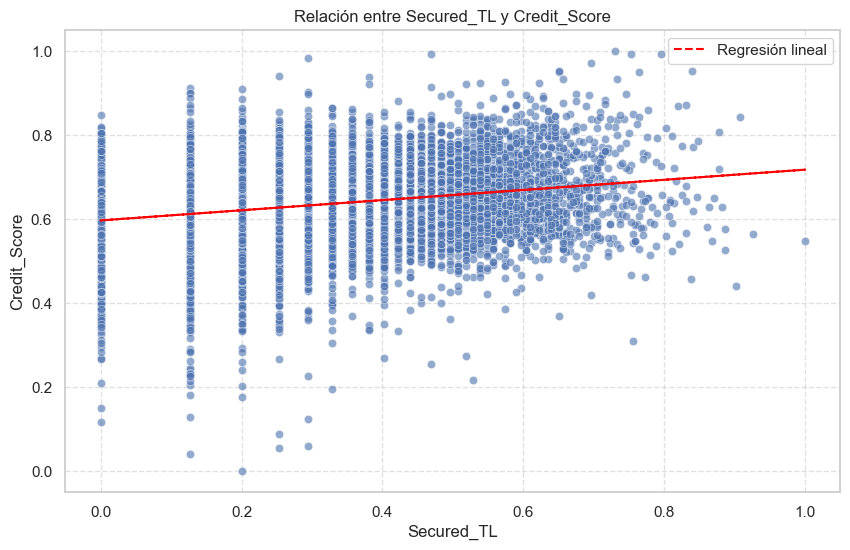

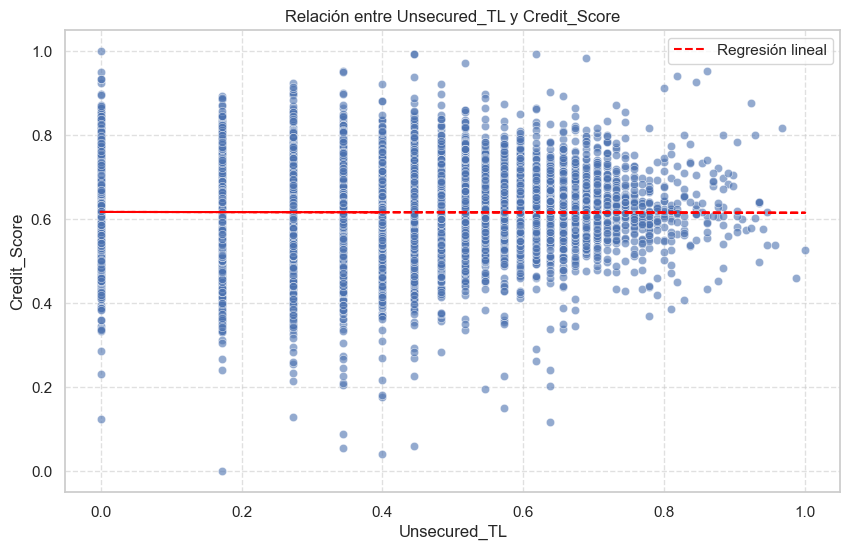

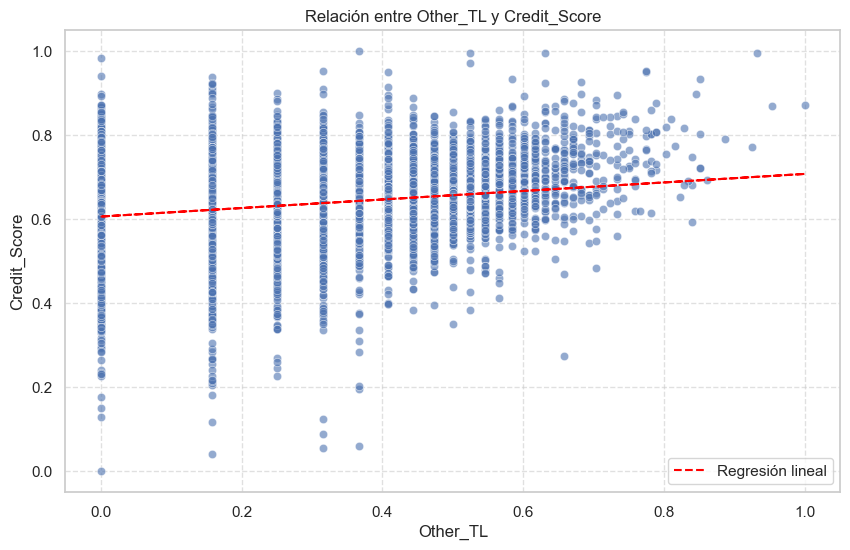

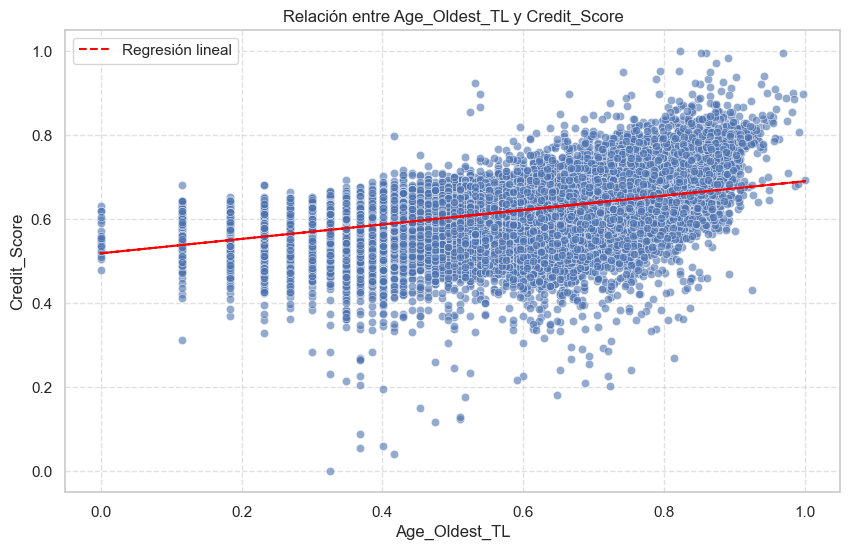

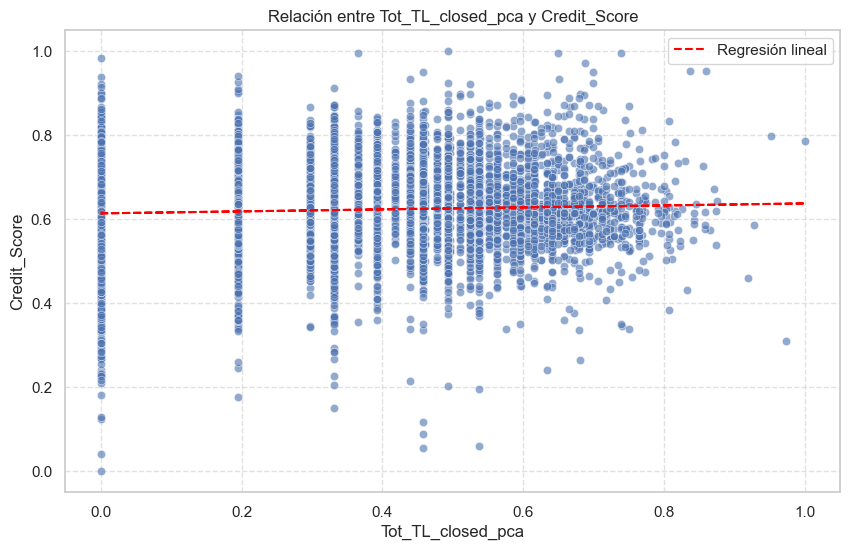

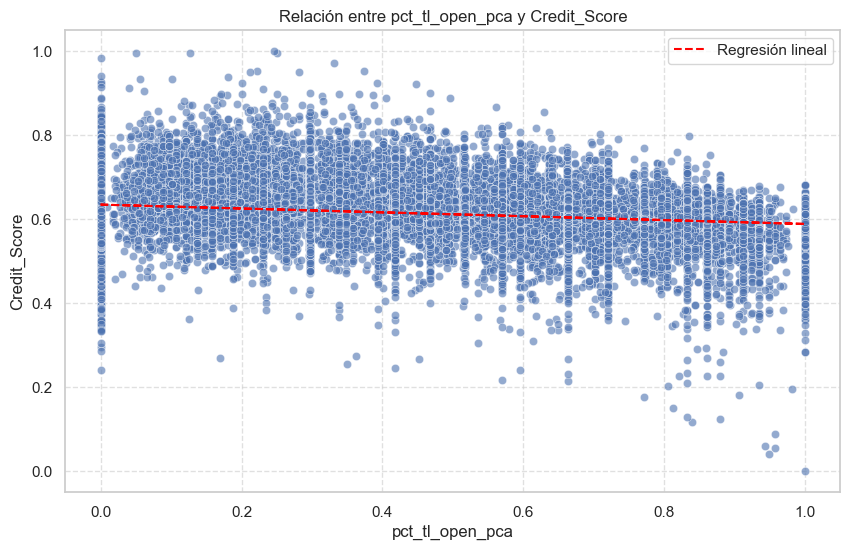

In [ ]:
# Llamamos la función que analiza las variables numéricas frente a la target
Analyze_Numeric_Features_Scatter(internal, numeric_features, 'Credit_Score')